# **Feature Selection, Model Selection and Tuning Project - Credit Card Users Churn Prediction**

**Context**

Thera bank facing decline is their credit card customers recently. That is causing the loss to the bank as credit card services generate significant amount of revenue. So the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same, so that bank could improve upon those areas.



**Objective**

The objective is to find a way for bank to improve its services so that customers do not renounce their credit cards. Need to create best possible classification model. 

Below are high level objectives - 

*   Explore and visualize the dataset.
*   Build a classification model to predict if the customer is going to churn or not
*   Optimize the model using appropriate techniques
*   Generate a set of insights and recommendations that will help the bank











**Data Dictionary**

**Customer details:**

CLIENTNUM: Client number. Unique identifier for the customer holding the account

Attrition_Flag: Internal event (customer activity) variable - if the account is 
closed then "Attrited Customer" else "Existing Customer"

Customer_Age: Age in Years

Gender: Gender of the account holder

Dependent_count: Number of dependents

Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student),Post-Graduate, Doctorate

Marital_Status: Marital Status of the account holder

Income_Category: Annual Income Category of the account holder

Card_Category: Type of Card

Months_on_book: Period of relationship with the bank

Total_Relationship_Count: Total no. of products held by the customer

Months_Inactive_12_mon: No. of months inactive in the last 12 months

Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months

Credit_Limit: Credit Limit on the Credit Card

Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance

Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)

Total_Trans_Amt: Total Transaction Amount (Last 12 months)

Total_Trans_Ct: Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter

Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter

Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

# **1. Loading Required Libraries and Importing Data**

In [62]:
# Importing libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Importing Libraries to help with EDA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 500)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import KNNImputer

# To build model for prediction
from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# To get model classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# To undersample and un the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do regularization
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [63]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# Create DataFrame 'bnkch' by importing 'BankChurners' file and make a copy of it just in case if need to revert back
bnkch = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BankChurners.csv')
bnkch_copy = bnkch.copy()

# **2. Exploring Data At High Level**

Check first 10 records to see the dataset at high level

In [65]:
bnkch.head(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6             NaN        Married         $120K +          Gold   
7     High School            NaN     $60K - $80K        Silver   
8      Uneducated         Single     $60K - $80K          Blue   
9        Graduate         Single    $80K - $120K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   
5              36                         3                       1   
6              46                         6                       1   
7              27                         2                       2   
8              36                         5                       2   
9              36                         6                       3   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   
5                      2        4010.0                 1247           2763.0   
6                      3       34516.0                 2264          32252.0   
7                      2       29081.0                 1396          27685.0   
8                      0       22352.0                 2517          19835.0   
9                      3       11656.0                 1677           9979.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   
5                 1.376             1088              24                0.846   
6                 1.975             1330              31                0.722   
7                 2.204             1538              36                0.714   
8                 3.355             1350              24                1.182   

By looking at sample records, at a first glace data looks good and as per the data dictionary with some missing values here and there. 

Let's check few basic things to understand the dataset better.

In [66]:
# checking for dups
bnkch.duplicated().sum()

0

There are no duplicates

In [67]:
# checking rows and columns of dataframe
bnkch.shape

(10127, 21)

There are 10127 rows and 21 columns

In [68]:
# check datatypes and non null counts
bnkch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Looks like there are some nulls in columns Education_Level and Marital_Status. Also, few object columns are there and they look valid. 

In [69]:
# check some stats of columns
bnkch.describe(include="all").T

count unique                top  freq  \
CLIENTNUM                 10127.0    NaN                NaN   NaN   
Attrition_Flag              10127      2  Existing Customer  8500   
Customer_Age              10127.0    NaN                NaN   NaN   
Gender                      10127      2                  F  5358   
Dependent_count           10127.0    NaN                NaN   NaN   
Education_Level              8608      6           Graduate  3128   
Marital_Status               9378      3            Married  4687   
Income_Category             10127      6     Less than $40K  3561   
Card_Category               10127      4               Blue  9436   
Months_on_book            10127.0    NaN                NaN   NaN   
Total_Relationship_Count  10127.0    NaN                NaN   NaN   
Months_Inactive_12_mon    10127.0    NaN                NaN   NaN   
Contacts_Count_12_mon     10127.0    NaN                NaN   NaN   
Credit_Limit              10127.0    NaN                NaN   NaN   
Total_Revolving_Bal       10127.0    NaN                NaN   NaN   
Avg_Open_To_Buy           10127.0    NaN                NaN   NaN   
Total_Amt_Chng_Q4_Q1      10127.0    NaN                NaN   NaN   
Total_Trans_Amt           10127.0    NaN                NaN   NaN   
Total_Trans_Ct            10127.0    NaN                NaN   NaN   
Total_Ct_Chng_Q4_Q1       10127.0    NaN                NaN   NaN   
Avg_Utilization_Ratio     10127.0    NaN                NaN   NaN   

                                      mean              std          min  \
CLIENTNUM                 739177606.333663  36903783.450231  708082083.0   
Attrition_Flag                         NaN              NaN          NaN   
Customer_Age                      46.32596         8.016814         26.0   
Gender                                 NaN              NaN          NaN   
Dependent_count                   2.346203         1.298908          0.0   
Education_Level                        NaN              NaN          NaN   
Marital_Status                         NaN              NaN          NaN   
Income_Category                        NaN              NaN          NaN   
Card_Category                          NaN              NaN          NaN   
Months_on_book                   35.928409         7.986416         13.0   
Total_Relationship_Count           3.81258         1.554408          1.0   
Months_Inactive_12_mon            2.341167         1.010622          0.0   
Contacts_Count_12_mon             2.455317         1.106225          0.0   
Credit_Limit                   8631.953698       9088.77665       1438.3   
Total_Revolving_Bal            1162.814061       814.987335          0.0   
Avg_Open_To_Buy                7469.139637      9090.685324          3.0   
Total_Amt_Chng_Q4_Q1              0.759941         0.219207          0.0   
Total_Trans_Amt                4404.086304      3397.129254        510.0   
Total_Trans_Ct                   64.858695         23.47257         10.0   
Total_Ct_Chng_Q4_Q1               0.712222         0.238086          0.0   
Avg_Utilization_Ratio             0.274894         0.275691          0.0   

                                  25%          50%          75%          max  
CLIENTNUM                 713036770.5  717926358.0  773143533.0  828343083.0  
Attrition_Flag                    NaN          NaN          NaN          NaN  
Customer_Age                     41.0         46.0         52.0         73.0  
Gender                            NaN          NaN          NaN          NaN  
Dependent_count                   1.0          2.0          3.0          5.0  
Education_Level                   NaN          NaN          NaN          NaN  
Marital_Status                    NaN          NaN          NaN          NaN  
Income_Category                   NaN          NaN          NaN          NaN  
Card_Category                     NaN          NaN          NaN          NaN  
Months_on_book                   31.0         

Few observations - 

1) All the customers are between age 26 and 73 with average age around 46. 

2) Dependent count is between 0 and 5 with mean and median around 2. 

3) Income values are divided into 6 categories with majority customer in less than 40K category. 

4) Customer relationships with bank is between 13 and 56 months. 

5) Total_Trans_Amt varies from 510 to more than 18K. It seems to have outliers. Similar with Total_Trans_Ct - will need to analyze those later. 

**Pre EDA Data Pre Processing**

CLIENTNUM can be dropped as it would not add any value in Modelling and would not be required for EDA as well. So it is better to drop at this point. 

In [70]:
# dropping ID column in original dataset
bnkch.drop(columns='CLIENTNUM', inplace=True)

There are quite a few 'object' columns, let's convert them to 'category' so would be helpful during EDA. 

In [71]:
# convert 'object' columns to 'category'

object_cols = ['Attrition_Flag','Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

bnkch[object_cols] = bnkch[object_cols].astype('category')

In [72]:
# check the type once
bnkch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

Looks good. Let's do EDA next.

# **3. Exploratory Data Analysis (EDA)**

### Univariate Analysis

Let's create function to find counts/percentage of columns with continuous values to understand the data better.

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

**Customer_Age**

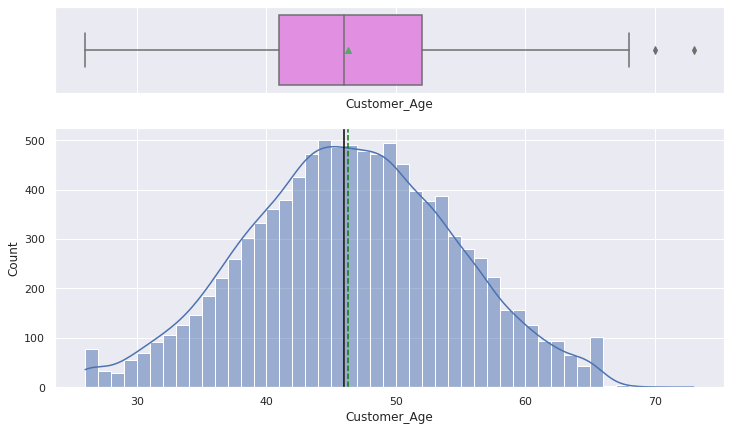

In [ ]:
histogram_boxplot(bnkch,'Customer_Age',kde=True)

Customer Age looks normalized with maximum number of customers around 45. 

**Credit_Limit**

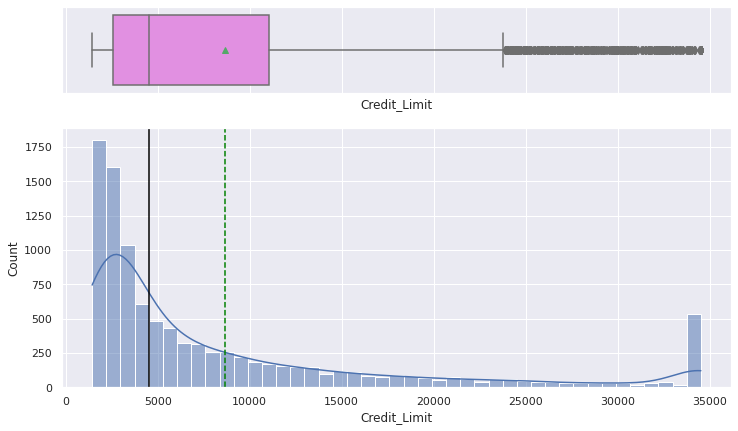

In [ ]:
histogram_boxplot(bnkch,'Credit_Limit',kde=True)

Credit_Limit is right skewed with many outliers after the right whiskers. Also, there is a big spike in count at around 34K, need to analyze that later. 

**Months_on_book**

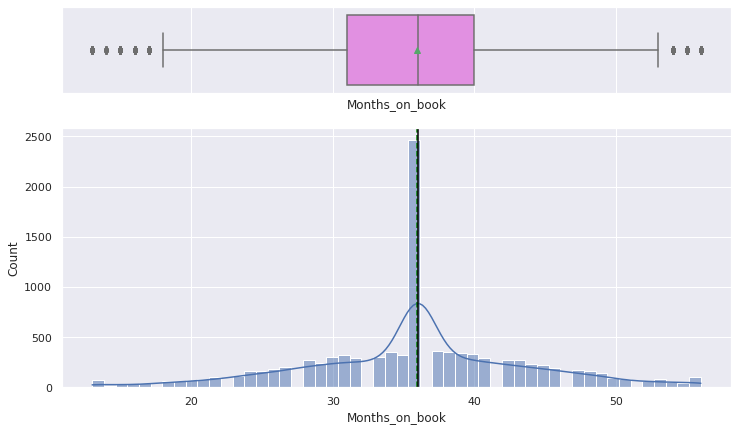

In [ ]:
histogram_boxplot(bnkch,'Months_on_book',kde=True)

Majority of customers have relationship with bank for around 36 months. There are some outliers at left whisker and right whisker.

**Total_Revolving_Bal**

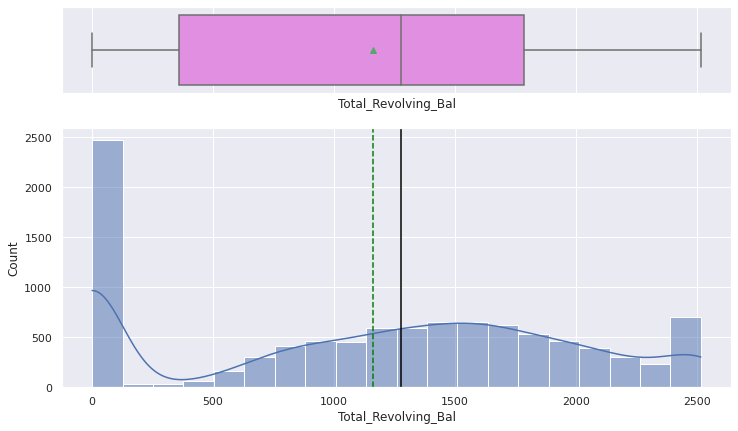

In [ ]:
histogram_boxplot(bnkch,'Total_Revolving_Bal',kde=True)

Majority of the customer do not have revolving balance (i.e.= 0). Need to analyze further to see if its a bad data or actually they do not use credit card. 

**Avg_Open_To_Buy**

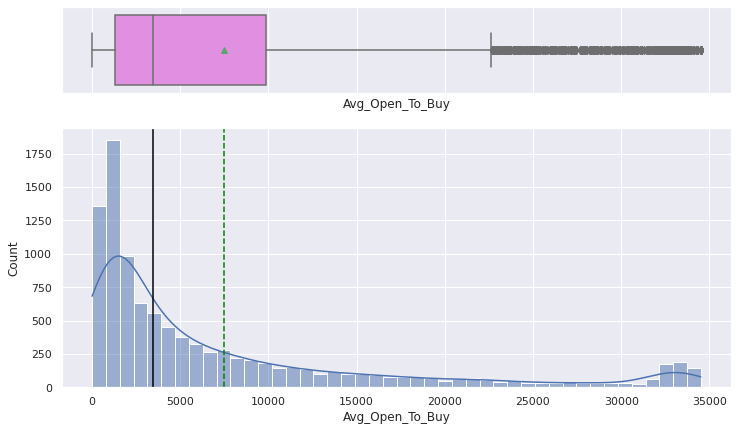

In [ ]:
histogram_boxplot(bnkch,'Avg_Open_To_Buy',kde=True)

It is skewed at right with lot of outliers after right whikser.

**Total_Amt_Chng_Q4_Q1**

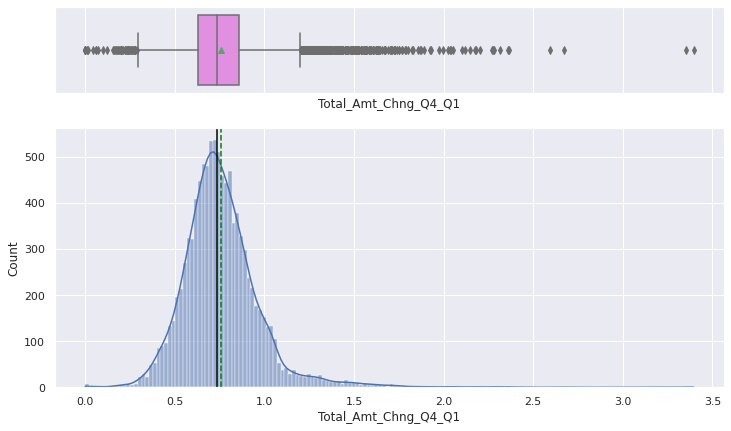

In [ ]:
histogram_boxplot(bnkch,'Total_Amt_Chng_Q4_Q1',kde=True)

It looks normally distributed with lot of outliers before left and after right whiskers.

**Total_Ct_Chng_Q4_Q1**

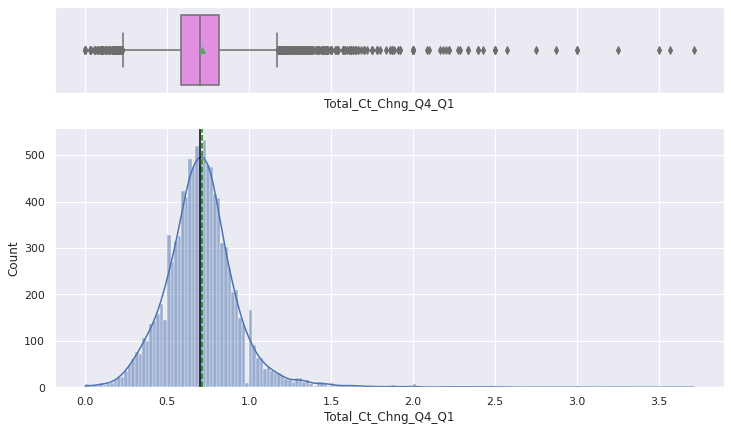

In [ ]:
histogram_boxplot(bnkch,'Total_Ct_Chng_Q4_Q1',kde=True)

Similar to amount, count graph is normally distributed with outliers on both sides. 

**Total_Trans_Amt**

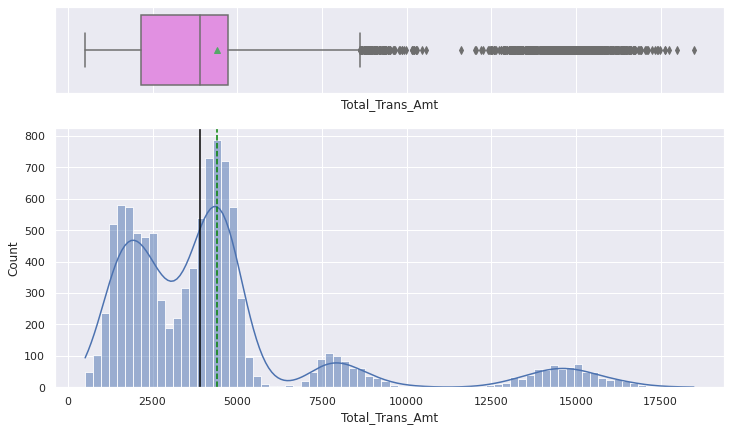

In [ ]:
histogram_boxplot(bnkch,'Total_Trans_Amt',kde=True)

Total trans amount has peaks and valleys. It also has lot of outliers after the right whisker.

**Total_Trans_Ct**

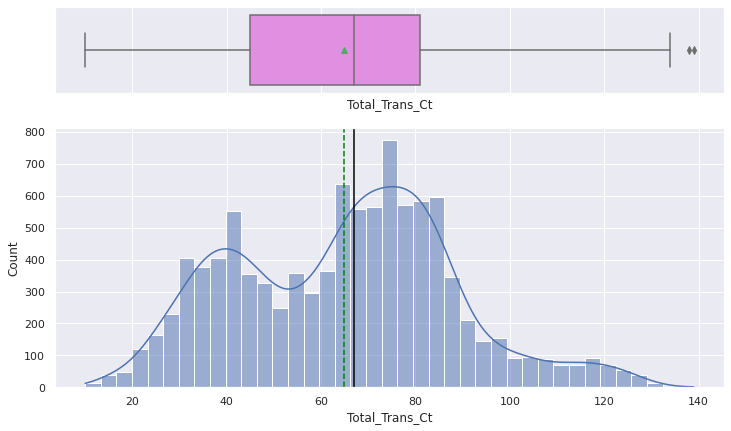

In [ ]:
histogram_boxplot(bnkch,'Total_Trans_Ct',kde=True)

Total trans count has couple of peaks and valleys with few outliers after right whisker. 

**Avg_Utilization_Ratio**

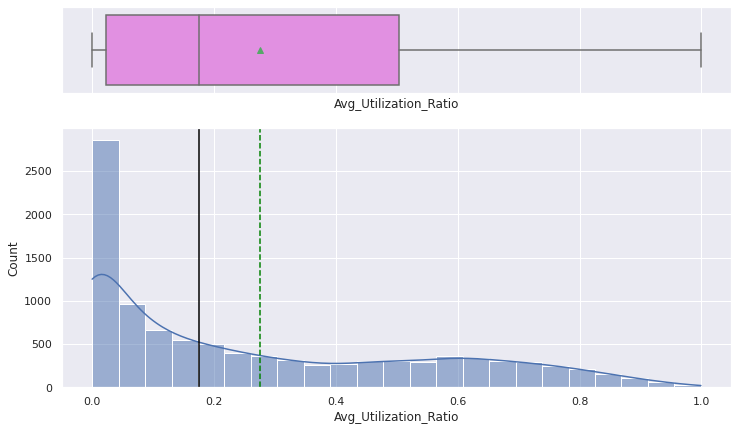

In [ ]:
histogram_boxplot(bnkch,'Avg_Utilization_Ratio',kde=True)

Average utilization is peaked at 0, meaning many customers do not spend money on this card at all, this is similar to what we saw on 'Total_Revolving_Bal' histogram. 


Let's create function to find counts/percentage of columns which supposed to have categorical data or data with handful of unique values to understand them better and find out if any bad data is there.

In [ ]:
# function to create labeled countplots

def labeled_countplot(data, feature, hue=None, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    if hue==None:
      ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
      )
    else: 
      ax = sns.countplot(
        data=data,
        x=feature,
        hue=hue,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
      )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Let's map all categorical columns

**Attrition_Flag**

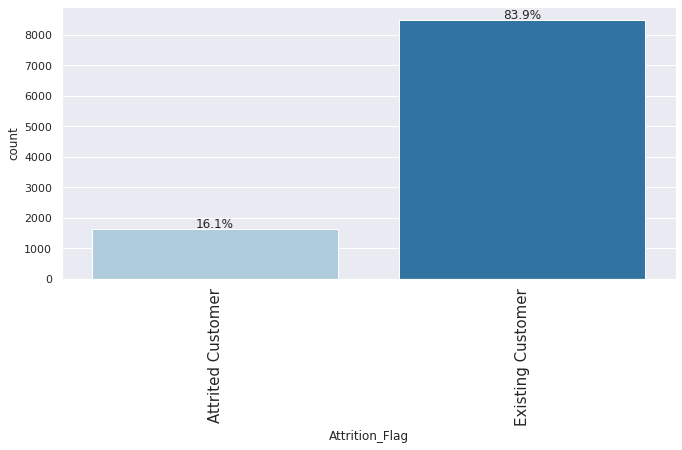

In [ ]:
labeled_countplot(bnkch,'Attrition_Flag',perc=True, n=10)

In dataset, around 16% customers have closed the account and around 84% are existing customers. 

**Gender**

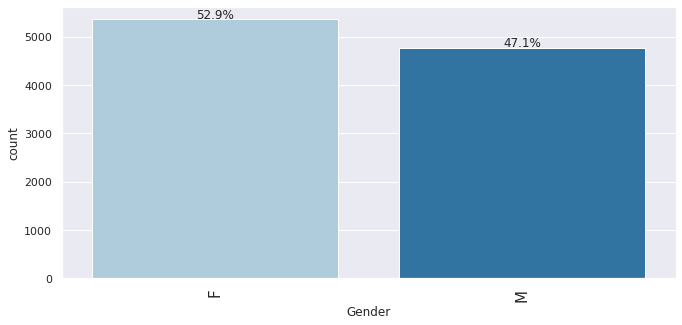

In [ ]:
labeled_countplot(bnkch,'Gender', perc=True,n=10)

Gender column is almost equally divided, female customers are bit higher. 

**Education_Level**

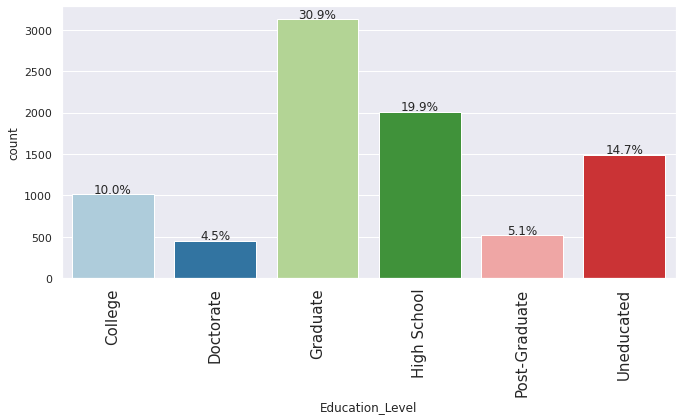

In [ ]:
labeled_countplot(bnkch,'Education_Level', perc=True, n=10)

Customers are divided into 6 levels with highest customers are 'Graduate' and lowest are 'Doctorate'.

**Marital_Status**

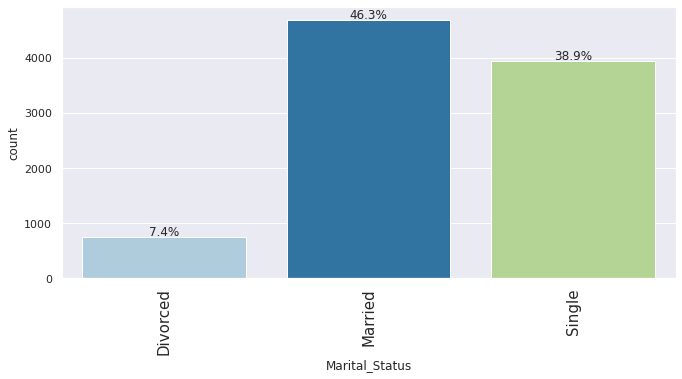

In [ ]:
labeled_countplot(bnkch,'Marital_Status', perc=True, n=10)

Majority of the customers are married followed by singles. 

**Income_Category**

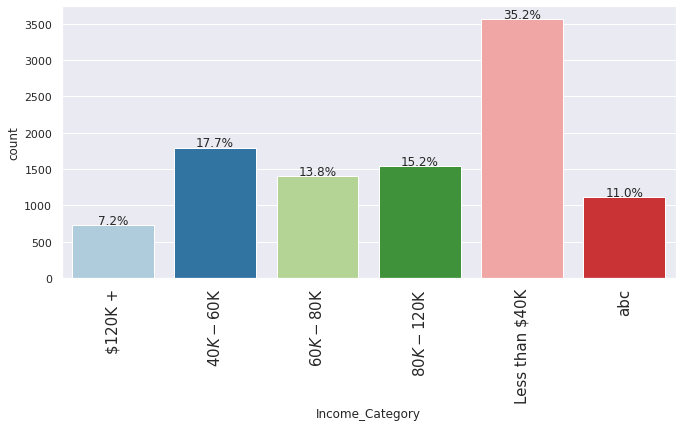

In [ ]:
labeled_countplot(bnkch,'Income_Category', perc=True, n=10)

Income is categorized into 6 category with highest at 'less than 40K'. However, there is a category called 'abc' - which I do not understand, we will need to analyze this data in detail in later section. 

**Card_Category**

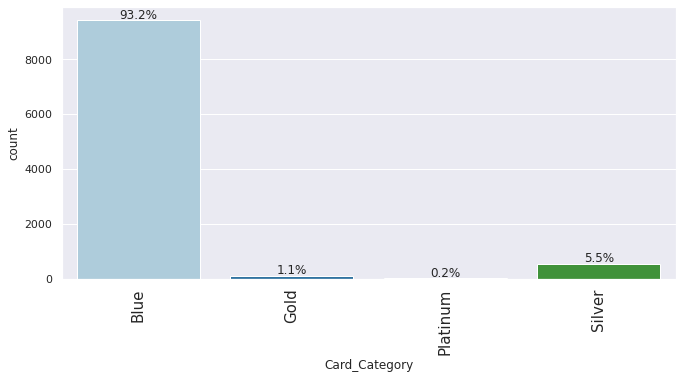

In [ ]:
labeled_countplot(bnkch,'Card_Category', perc=True, n=10)

More than 93% of customers have 'Blue' card from the bank. Rest all divided into other 3 categories. 

Let's map numeric columns with handful of unique values.

**Dependent_count**

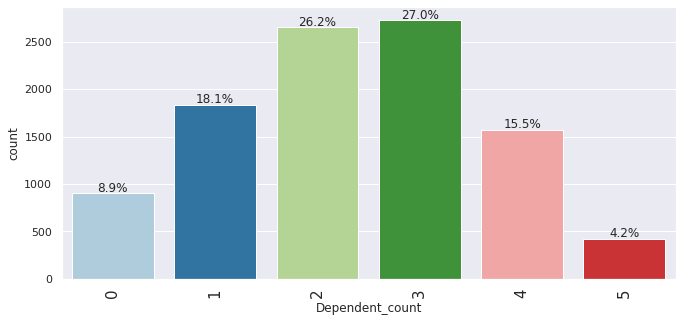

In [ ]:
labeled_countplot(bnkch,'Dependent_count', perc=True,n=10)

No bad data. Most of the customers have either 3 or 2 dependents. 

**Total_Relationship_Count**

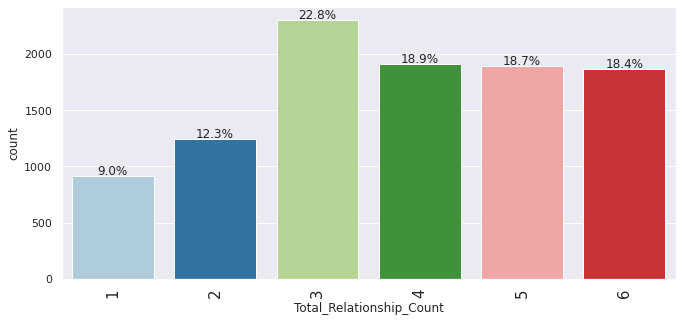

In [ ]:
labeled_countplot(bnkch,'Total_Relationship_Count', perc=True,n=10)

No bad data. Highest number of customers hold 3 products and almost equal number of customers hold 4,5 and 6 products. 

**Months_Inactive_12_mon**

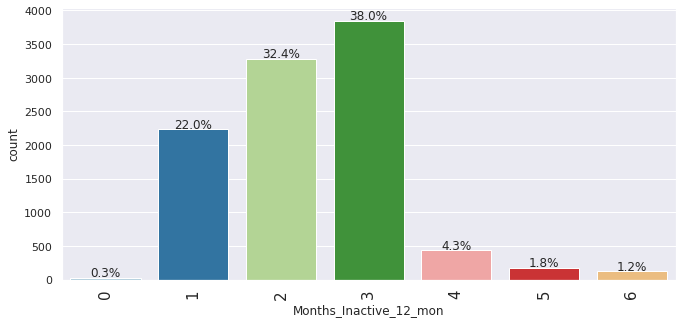

In [ ]:
labeled_countplot(bnkch,'Months_Inactive_12_mon', perc=True,n=10)

No bad data. Highest number of customers are inactive for 3 months in last 12 months, followed by 2 and then 1.  

**Contacts_Count_12_mon**

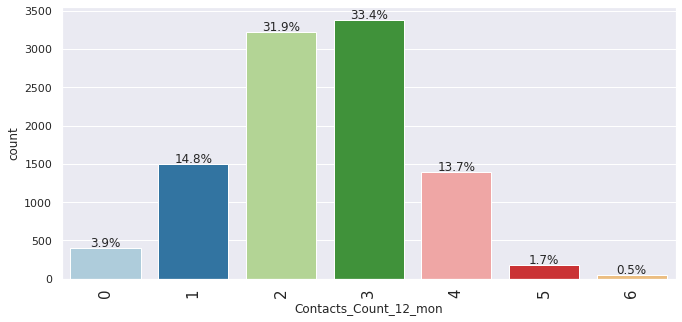

In [ ]:
labeled_countplot(bnkch,'Contacts_Count_12_mon', perc=True,n=10)

No bad data. Highest customer contact count is 3, followed by 2 and 1. 

### Bivariate Analysis

Let's start by finding the correlations between different columns to get generic idea.

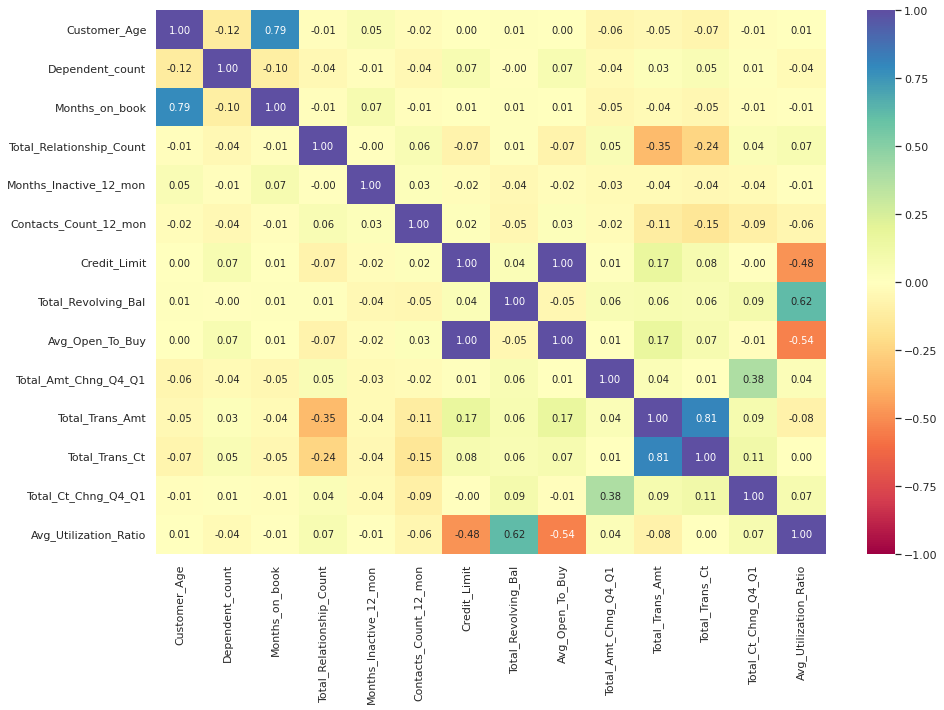

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    bnkch.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Few observations - 

1) Average_Open_To_Buy and Credit_Limit has correlation of 1. They are 100% correlated, one can be dropped later. 

2) Customer_Age and Months_On_Book has high positive correlation as well. The older the customer, more he/she is with bank. 

3) Avg_Utilization_Ratio is negatively correlated with Credit_Limit and Avg_Open_To_Buy, meaning more credit customer has lesser the utilization of their credit. 

4) Avg_Utilization_Ratio has bit high positive correlation with Total_Revolving_Bal which makes sense higher the usage, higher the balance due. 

5) Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1 are positively correlated and it should be. 


Let's draw a pairplot to further analysis.

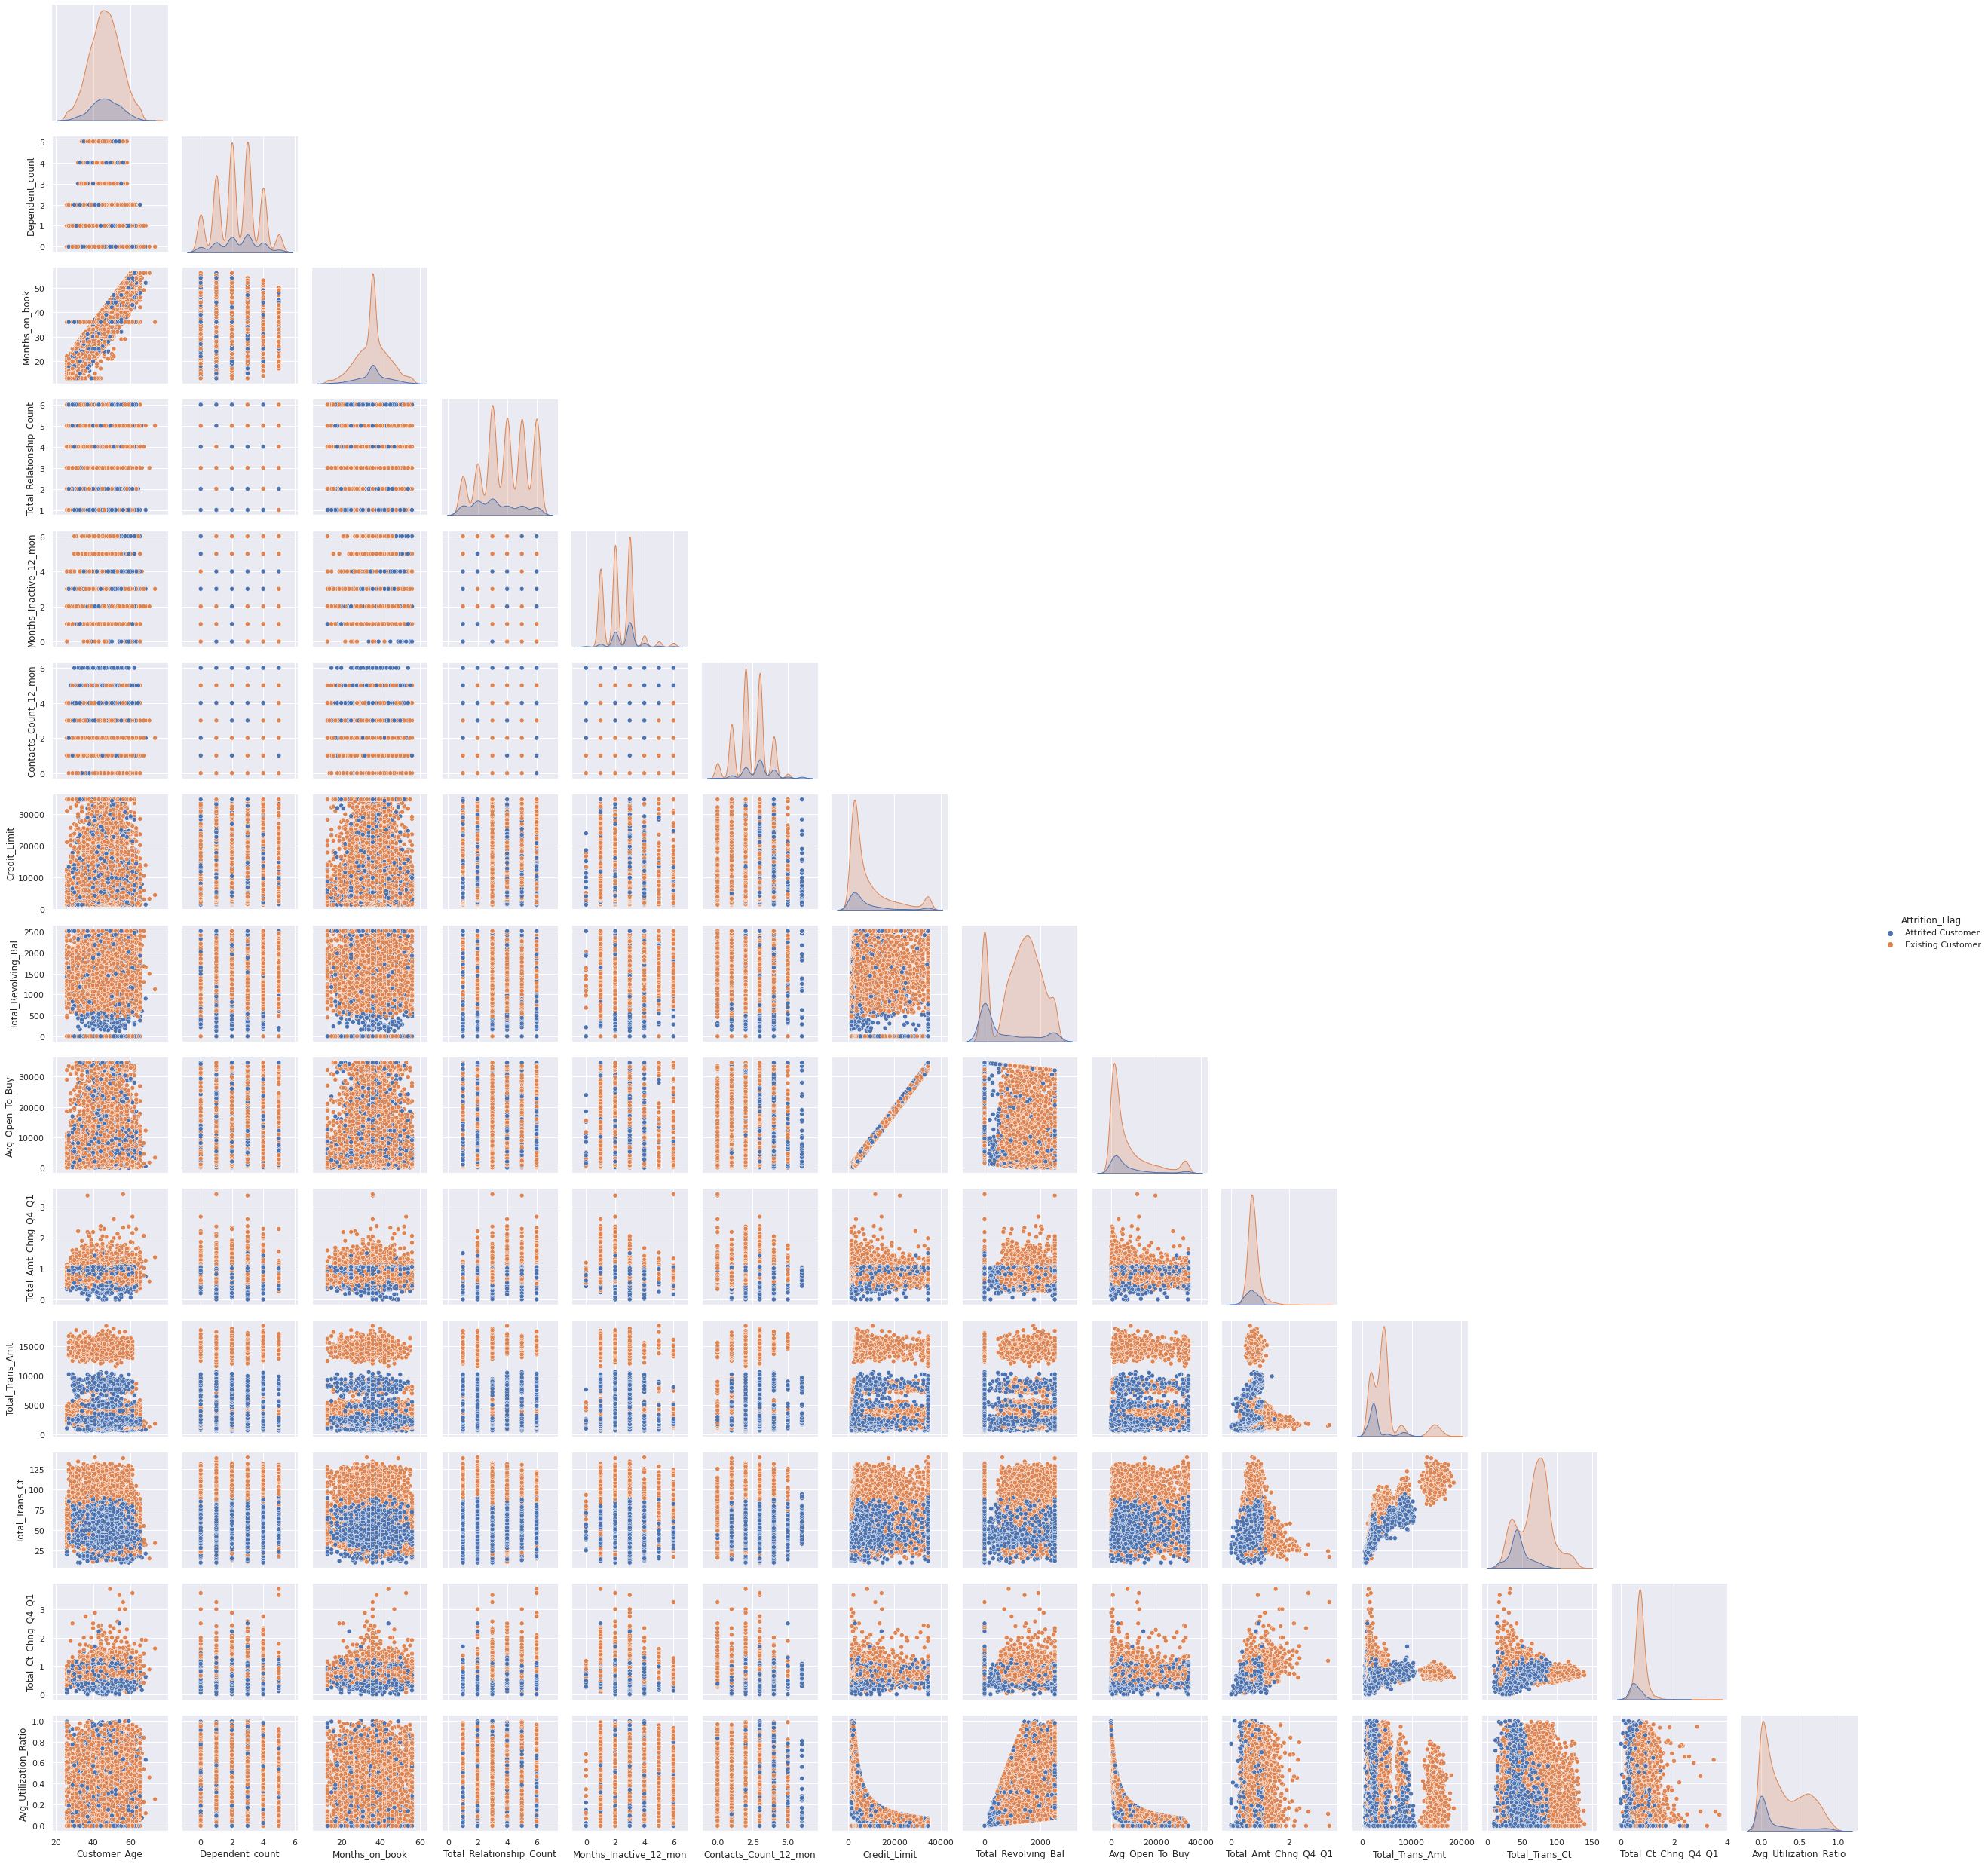

In [ ]:
sns.pairplot(bnkch, hue = 'Attrition_Flag' , corner=True);

Few observations - 

1) Customer age has normalized curve for both attrited and existing customers. 

2) Total trans amount and count is higher in existing customers. 

3) Credit limit (and avg open to buy) and avg utilization ratio has somewhat negative correlation. 

4) trans amount change q4_q1 and trans count change q4_q1 are normally distributed for both the classes with long right tail. They are somewhat positively related with total trans amount and count and which makes sense. 

Let's create a function to plot stacked barplot to check columns with less distinct values and see their affect on Attrition_Flag column.

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Gender vs. Attrition_Flag**

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


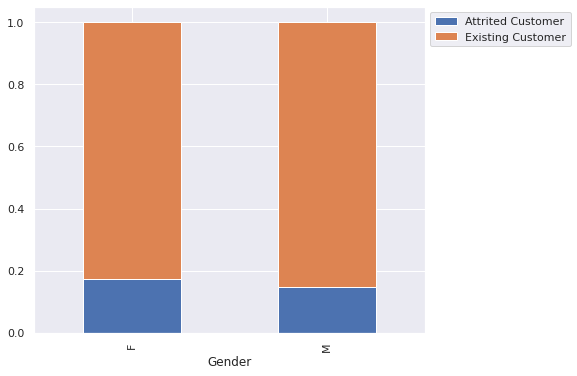

In [ ]:
stacked_barplot(bnkch,'Gender','Attrition_Flag')

Female customers are bit higher than male customers. Both of them have almost same ratio of attrited and existing customers. 

**Education_Level vs. Attrition_Flag**

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


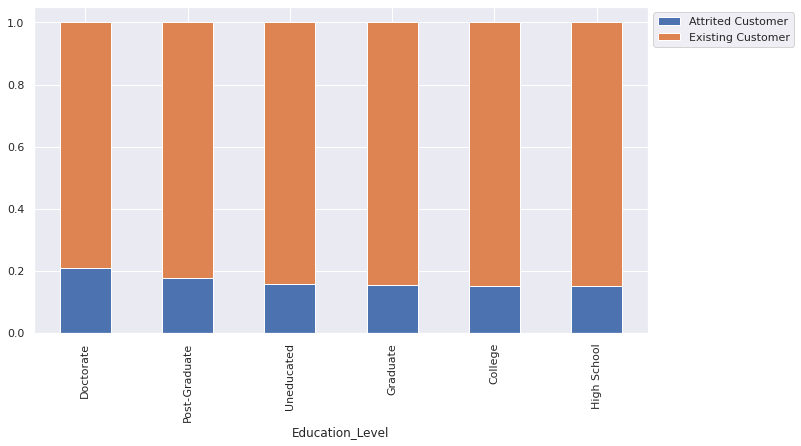

In [ ]:
stacked_barplot(bnkch,'Education_Level','Attrition_Flag')

Doctorate customers are the highest percentage of attrited customers followed by post graduates. Rest all category has kind of same ratio of attrited and existing customers.

**Marital_Status vs. Attrition_Flag**

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


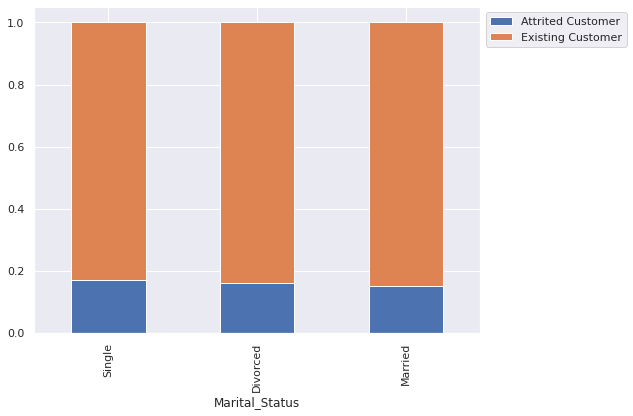

In [ ]:
stacked_barplot(bnkch,'Marital_Status','Attrition_Flag')

All values of marital status has same ratio of attrited and existing customers. Marital status really do not affect the outcome. 

**Income_Category vs. Attrition_Flag**

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


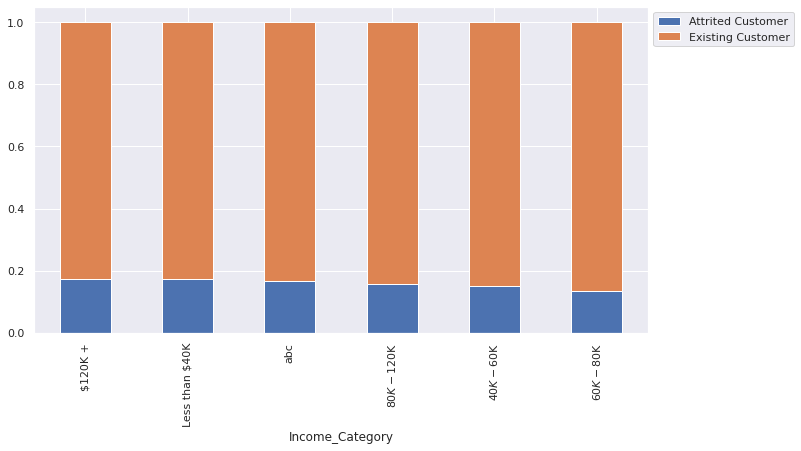

In [ ]:
stacked_barplot(bnkch,'Income_Category','Attrition_Flag')

Maximum customers earn less than $40K. Customers earn between 60K-80K have highest percentage of existing customers. 

**Card_Category vs. Attrition_Flag**

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


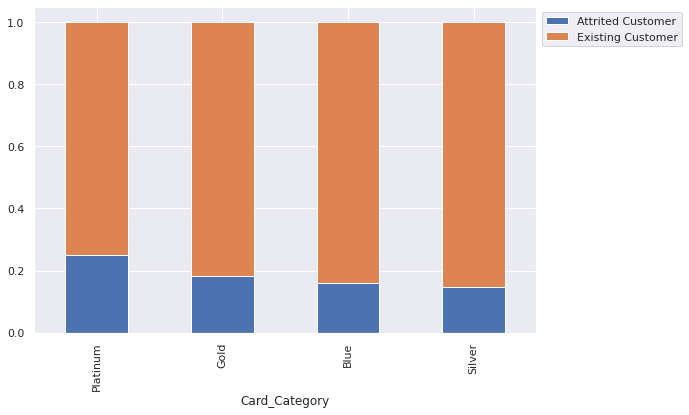

In [ ]:
stacked_barplot(bnkch,'Card_Category','Attrition_Flag')

Majority customers have Blue card and the least have Platinum card. The highest percentage of attrited customers have platinum car. 

**Dependent_count vs. Attrition_Flag**

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


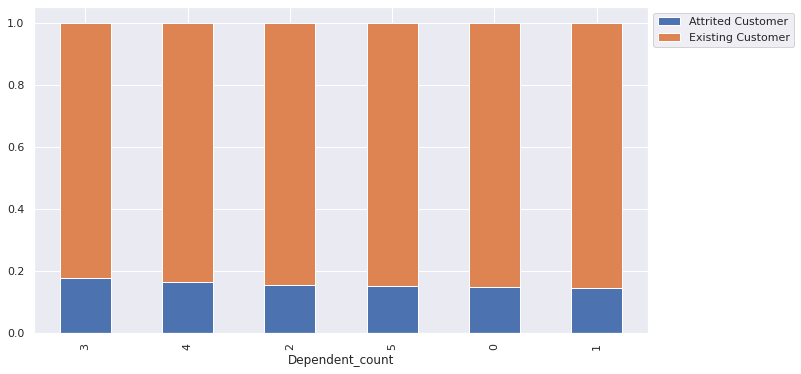

In [ ]:
stacked_barplot(bnkch,'Dependent_count','Attrition_Flag')

Almost all dependent count has the same ratio of attrited and existing customers. Maximum customers have 3 dependents. 

**Total_Relationship_Count vs. Attrition_Flag**

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


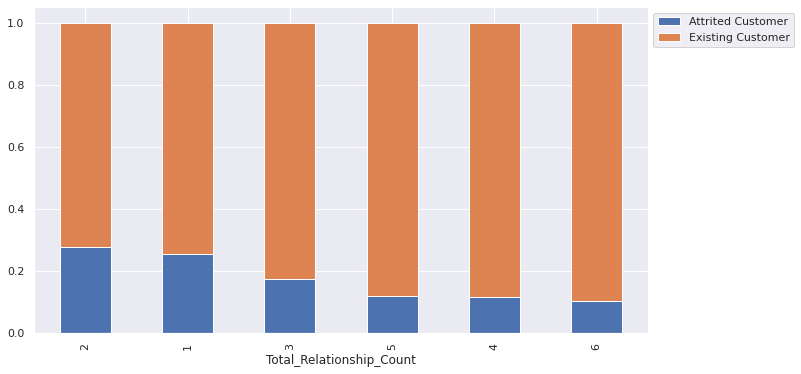

In [ ]:
stacked_barplot(bnkch,'Total_Relationship_Count','Attrition_Flag')

Majority customers have 3 relations with bank followed by 2. Customers with 1 or 2 relations have highest attrition rate. As the relations increase, it decreases the attrition rate. 

**Months_Inactive_12_mon vs. Attrition_Flag**

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


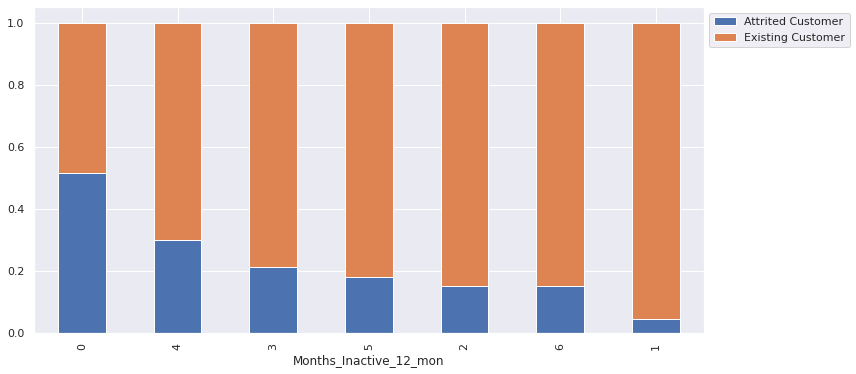

In [ ]:
stacked_barplot(bnkch,'Months_Inactive_12_mon','Attrition_Flag')

Maximum customers were inactive for 3 months in last 12 months. Customers who were active for all the months have the highest percentage of attrition. That makes sense as company saw recent decline.

**Contacts_Count_12_mon vs. Attrition_Flag**

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


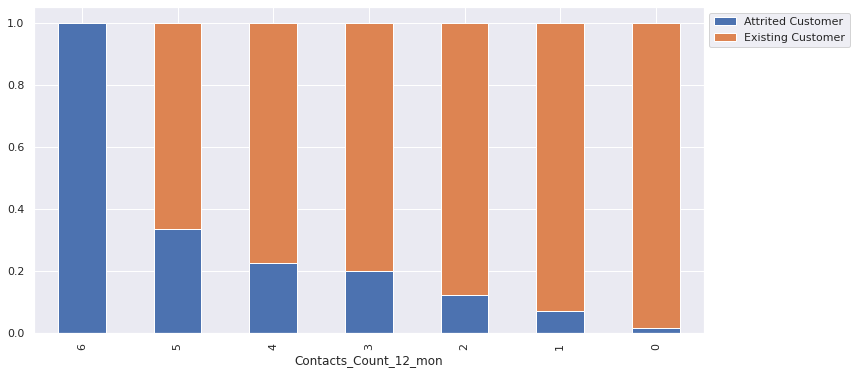

In [ ]:
stacked_barplot(bnkch,'Contacts_Count_12_mon','Attrition_Flag')

As the number of contact increases, the percentage of attrition also increases. 100% customers attrited when were contacted 6 times. 

**Customer_Age vs. Attrition_Flag**

Age has lot of distinct values. I would like to use the labled_countplot function to do the analysis.

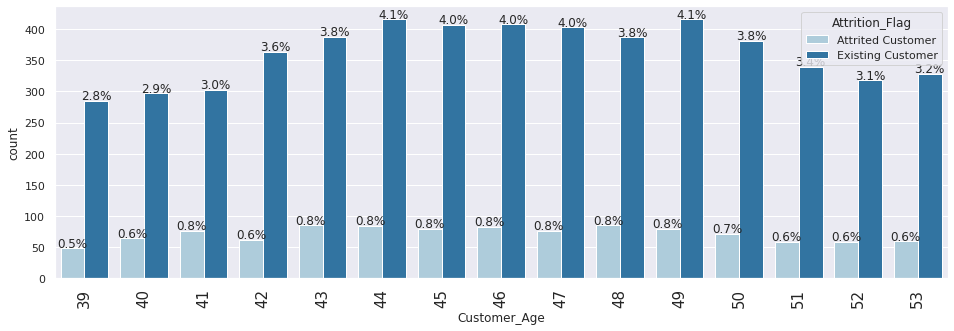

In [ ]:
labeled_countplot(bnkch,'Customer_Age',hue='Attrition_Flag', perc=True, n=15)

Age doesn't really affect the ratio of attrited and existing customers. Maximum % of customers are between 44-48.

**Months_on_book vs. Attrition_Flag**

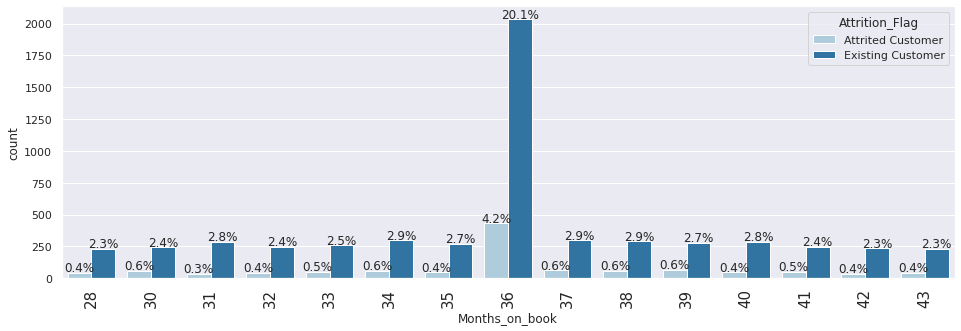

In [ ]:
labeled_countplot(bnkch,'Months_on_book',hue='Attrition_Flag', perc=True, n=15)

Maximum customers have 36 months of relationship with the bank and highest percentage of attrited customers are also fall into same bucket. 

Let's build box plot for all the numeric columns with respect to 'Attrition_Flag'.

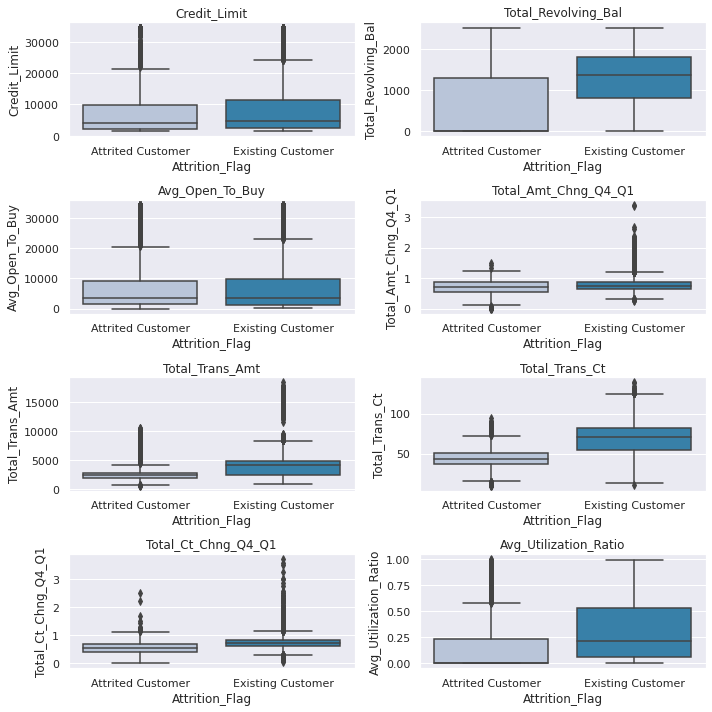

In [ ]:
cols = bnkch[['Credit_Limit'              
,'Total_Revolving_Bal'         
,'Avg_Open_To_Buy'           
,'Total_Amt_Chng_Q4_Q1'      
,'Total_Trans_Amt'             
,'Total_Trans_Ct'
,'Total_Ct_Chng_Q4_Q1'       
,'Avg_Utilization_Ratio'
]].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(4,2,i+1)
                     sns.boxplot(bnkch["Attrition_Flag"],bnkch[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

Few observations - 

1) Credit limit values are kind of distributed same for both attrited and existing customers. Both has lot of outliers at the right. 

2) Total trans amount and count have outliers for both attrited and existing customers. Attrited customers have lower median value. 

3) Age_open_to_buy doesn't have any impact on attrition or existing customers. 

4) Majority atttrited customers have less avg_utilization_ratio compare to existing customers, however attrited have lot of outliers after the right whisker. 

I would like to check the relationships between some columns to understand the data better. 

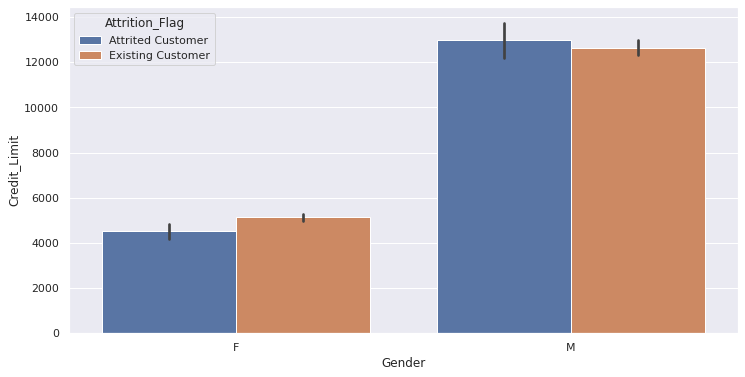

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y='Credit_Limit',x='Gender',hue='Attrition_Flag',data=bnkch);

Male customers have higher credit limit compare to Female. Also, the attrition in female is less compare to male. 

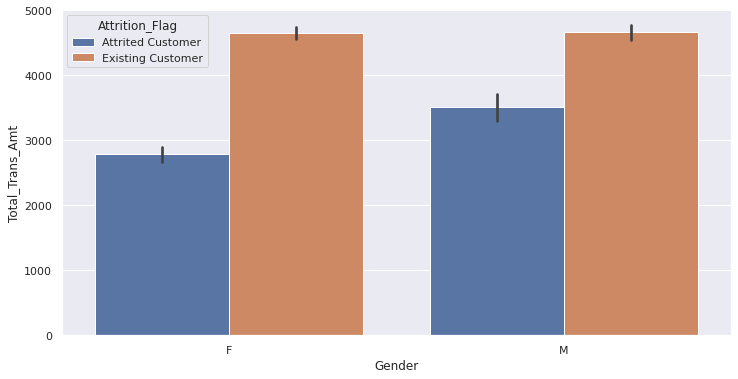

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y='Total_Trans_Amt',x='Gender',hue='Attrition_Flag',data=bnkch);

Even though there is a difference in credit limit as seen in the graph before, the total transactions are much closer between male and female.

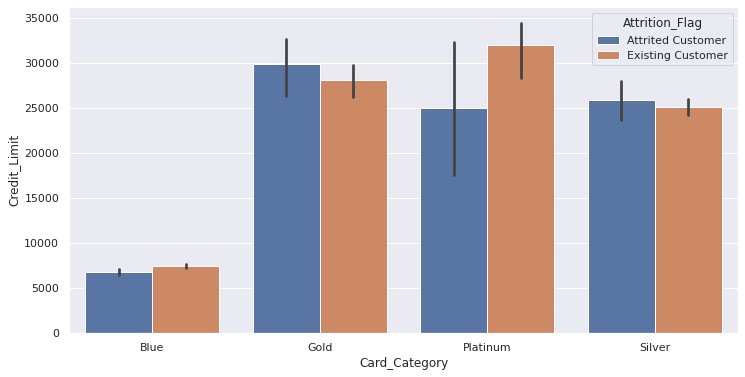

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y='Credit_Limit',x='Card_Category',hue='Attrition_Flag',data=bnkch);

Platinum has the highest credit limit and Blue has the lowest.

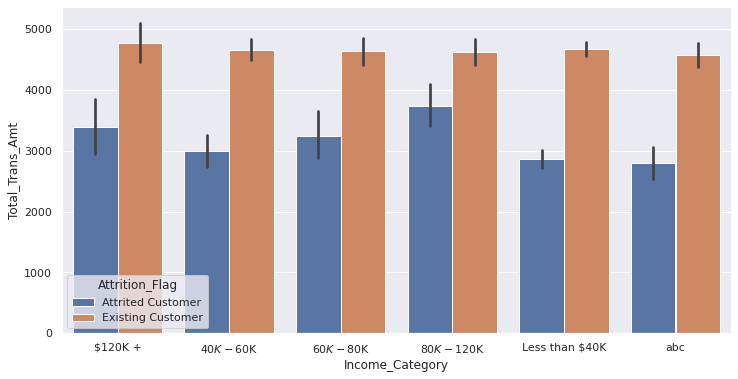

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y='Total_Trans_Amt',x='Income_Category',hue='Attrition_Flag',data=bnkch);

Transaction amount of existing customers doesn't affect much by their income category. 

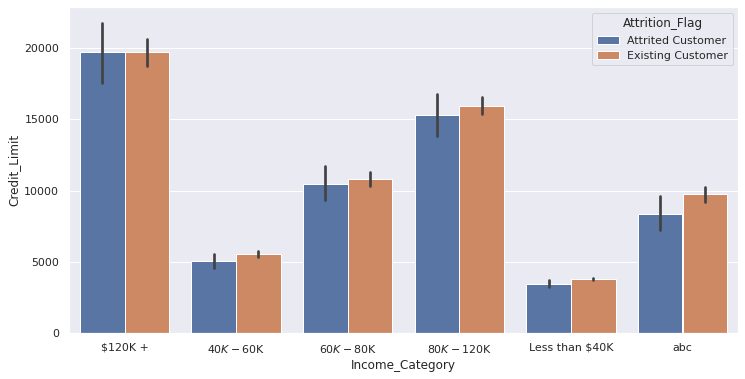

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y='Credit_Limit',x='Income_Category',hue='Attrition_Flag',data=bnkch);

Higher income customers have higher credit limit, which makes sense.

### Summary of Observations of EDA

Customer Age - customers are divided across different age groups from 26 to 73 and normally distributed with few outliers at the end. Most of them between 44 and 48. There are no outliers and Age doesn't really affect the attrition ratio.

Income Category - highest number of customers earn less than 40k, followed by 40k-60k range. It doesn't affect the attrition ratio. Higher the income, higher the credit limit. 

Month on Book- Most of the customers have 3 years of relationship with bank. It has outliers on both the ends. it doesn't really affect the attrition ratio.

Credit Limit - it doesn't affect the attrition of customers. It has multiple peaks and valleys and have lot of outliers at the end, need to be analyzed later. Maximum customers have limit around ~35K. It is highly correlated with avg_open_to_buy. One of them can be dropped later.

Total_Revolving_Bal - Majority of the customer do not have revolving balance (i.e.= 0). Need to analyze further to see if its a bad data or actually they do not use credit card. It is some what positively correlated with avg utilizaiton ratio.

Card Category - maximum customers prefer Blue card but highest percentage of attrition observed in Platinum. 

Gender - there are more female customers compare to male, the attrition ratio is kind of same in both. However, the female customer have lower credit limit than male but transaction amount spends do not have much difference. 

Education Level - around 30% customers are graduates, this column doesn't affect the attrition rate.  

Marital Status - little less than half customers are married, attrition ratio doesn't affect by marital status. 

Contact counts 12 mon - majority of customers contacted 2 or 3 times in last year. When there were 6 contacts in last 12 months, that's where the maximum attrition rate is. 

Months inactive 12 mon - most of the customers are inactive for 3 months and highest attrition when they are active all months. 

Dependent Count - customers have mostly 2 or 3 dependents and it doesn't have impact on attrition ratio. 

Total Trans Amt - existing cusotmers have much higher than attrited customers and it is highly correlated with count and it should be. Both have lot of outliers at the right side of whisker. 

Total Trans Cnt - same like trans amount, it is much higher in existing customers and has outliers at the right. 

Total amt and count change q4_q1 - Both of these columns are positively correlated and it should be. Both have more outliers at the right side in existing customers. 

Avg Utilization Ratio - it has value between 0 and 1 with many customers at 0. It is negatively correlated with credit limit. It has lot of outliers on right in attrited customers. 

None of the columns having bad data except income category that need to be treated along with missing values in some columns. There are some outliers in few columns and it would be checked later to see if its valid or not.


# **4. Data Pre-Processing**

### Outlier Detection and Treatment

Let's check outliers found in EDA section - Credit_Limit, Months_on_book, Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1, Total_Trans_Amt. Found outliers in Avg_Open_To_Buy as well but as it is ~100% correlated with Credit_Limit, I am going to drop that column later anyway so will not check for outliers.

**Credit_Limit**

During EDA, it was observed there were many records right after right whisker uptil around 24K mark but they look small in count. However, around 34K mark, there was a huge spike. Let's analyze records above that mark.  

In [73]:
bnkch.loc[bnkch['Credit_Limit']>34000]

Attrition_Flag  Customer_Age Gender  Dependent_count  \
6      Existing Customer            51      M                4   
45     Existing Customer            49      M                4   
61     Attrited Customer            48      M                2   
65     Existing Customer            51      M                4   
70     Existing Customer            51      M                4   
...                  ...           ...    ...              ...   
10088  Existing Customer            45      M                2   
10095  Existing Customer            46      M                3   
10098  Attrited Customer            55      M                3   
10110  Existing Customer            56      M                1   
10112  Attrited Customer            33      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
6                 NaN        Married         $120K +          Gold   
45         Uneducated         Single    $80K - $120K          Blue   
61           Graduate        Married     $60K - $80K        Silver   
65         Uneducated         Single    $80K - $120K        Silver   
70           Graduate         Single         $120K +          Blue   
...               ...            ...             ...           ...   
10088        Graduate         Single     $60K - $80K        Silver   
10095             NaN        Married    $80K - $120K          Blue   
10098        Graduate         Single         $120K +        Silver   
10110        Graduate         Single    $80K - $120K        Silver   
10112         College        Married         $120K +          Gold   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
6                  46                         6                       1   
45                 30                         3                       2   
61                 35                         2                       4   
65                 38                         4                       1   
70                 42                         3                       2   
...               ...                       ...                     ...   
10088              33                         4                       2   
10095              33                         4                       1   
10098              36                         4                       3   
10110              49                         5                       2   
10112              20                         2                       1   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6                          3       34516.0                 2264   
45                         3       34516.0                    0   
61                         4       34516.0                    0   
65                         4       34516.0                 1515   
70                         3       34516.0                 1763   
...                      ...           ...                  ...   
10088                      2       34516.0                 1529   
10095                      3       34516.0                 1099   
10098                      4       34516.0                    0   
10110                      2       34516.0                 1091   
10112                      4       34516.0                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6              32252.0                 1.975             1330              31   
45             34516.0                 1.621             1444              28   
61             34516.0                 0.763              691              15   
65             33001.0                 0.592             1293              32   
70             32753.0                 1.266             1550              41   
...                ...                   ...              ...             ...   
10088          32987.0                 0.609            13940             105   
10095          33417.0

More than 500 customers have credit limit above 34K with max value at 34,615 as seen earlier. I do not think I should consider these as bad records and treat them. I will leave them alone. Also, looking at the handful of data, the limit was assigned to people with higher income bracket as well, so it is kind of make sense. 

**Months_on_book**

During EDA, it was observed the outliers were at both left and right side. The right was after around 55 and left before 18. Let's analyze data for both.

In [74]:
bnkch.loc[bnkch['Months_on_book']>55]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
18    Existing Customer            61      M                1     High School   
27    Existing Customer            63      M                1             NaN   
39    Attrited Customer            66      F                0       Doctorate   
108   Existing Customer            62      F                1             NaN   
151   Existing Customer            68      M                1        Graduate   
177   Existing Customer            67      F                1        Graduate   
208   Existing Customer            63      M                1        Graduate   
254   Existing Customer            70      M                0     High School   
320   Existing Customer            67      M                0        Graduate   
358   Existing Customer            61      F                0        Graduate   
388   Existing Customer            64      M                0             NaN   
432   Existing Customer            67      F                0             NaN   
552   Existing Customer            65      M                2             NaN   
559   Attrited Customer            62      M                0     High School   
617   Existing Customer            65      F                0        Graduate   
634   Existing Customer            65      M                1      Uneducated   
659   Attrited Customer            61      F                0        Graduate   
775   Attrited Customer            62      F                1     High School   
1004  Existing Customer            65      F                0        Graduate   
1104  Existing Customer            64      M                0       Doctorate   
1182  Existing Customer            62      M                1     High School   
1186  Existing Customer            64      F                1     High School   
1212  Existing Customer            65      F                0             NaN   
1227  Existing Customer            65      F                0         College   
1228  Existing Customer            65      M                0     High School   
1292  Existing Customer            65      M                0        Graduate   
1321  Existing Customer            65      M                0        Graduate   
1330  Existing Customer            61      M                0        Graduate   
1614  Existing Customer            65      F                0        Graduate   
1625  Existing Customer            65      M                1         College   
1745  Existing Customer            65      F                0        Graduate   
1760  Existing Customer            65      F                0        Graduate   
1825  Existing Customer            65      M                0        Graduate   
1830  Attrited Customer            65      F                0        Graduate   
1891  Existing Customer            65      F                0   Post-Graduate   
1990  Existing Customer            65      M                0             NaN   
2104  Existing Customer            63      F                0      Uneducated   
2169  Existing Customer            65      F                0      Uneducated   
2170  Existing Customer            65      M                0     High School   
2214  Existing Customer            63      M                0        Graduate   
2236  Existing Customer            65      F                1        Graduate   
2252  Existing Customer            65      M                1     High School   
2325  Existing Customer            61      M                0   Post-Graduate   
2333  Existing Customer            65      M                0       Doctorate   
2348  Existing Customer            65      M                0      Uneducated   
2367  Existing Customer            63      F                1     High School   
2377  Existing Customer            65      F                0      Uneducated   
2406  Existing Customer            65      F                1        Graduate   
2620  Existing Customer            65   

There are more than 100 records with value of 56. 56 is not that high number, it is less than 5 years, which is reasonable to have relationship with the bank.

Let's analyze records with months on book less than 18. 

In [75]:
bnkch.loc[bnkch['Months_on_book']<18]

Attrition_Flag  Customer_Age Gender  Dependent_count  \
514    Existing Customer            33      M                2   
521    Existing Customer            26      M                0   
560    Existing Customer            26      M                0   
766    Existing Customer            29      M                2   
803    Existing Customer            30      M                1   
890    Existing Customer            30      F                0   
964    Existing Customer            34      M                0   
1066   Existing Customer            26      M                1   
1098   Existing Customer            35      M                3   
1100   Existing Customer            36      M                4   
1118   Existing Customer            29      M                0   
1134   Existing Customer            32      F                2   
1143   Existing Customer            33      M                1   
1158   Existing Customer            26      M                0   
1160   Existing Customer            36      M                1   
1205   Existing Customer            26      F                0   
1248   Existing Customer            30      F                1   
1258   Existing Customer            38      F                4   
1265   Existing Customer            27      F                1   
1276   Existing Customer            26      F                0   
1310   Existing Customer            26      M                1   
1327   Existing Customer            36      M                3   
1343   Existing Customer            36      F                5   
1346   Existing Customer            27      M                0   
1381   Existing Customer            29      M                1   
1383   Existing Customer            27      M                0   
1413   Existing Customer            26      F                1   
1414   Existing Customer            32      M                0   
1419   Existing Customer            30      M                2   
1462   Existing Customer            26      F                0   
1476   Existing Customer            26      M                0   
1488   Existing Customer            26      F                0   
1503   Existing Customer            26      F                0   
1522   Existing Customer            35      F                2   
1523   Existing Customer            26      M                0   
1585   Existing Customer            30      M                0   
1592   Existing Customer            26      F                0   
1599   Existing Customer            35      F                1   
1634   Attrited Customer            26      F                0   
1655   Attrited Customer            26      M                0   
1683   Existing Customer            26      M                0   
1687   Existing Customer            26      F                0   
1726   Existing Customer            28      F                0   
1733   Existing Customer            26      F                1   
1738   Existing Customer            35      M                2   
1748   Existing Customer            30      F                1   
1763   Existing Customer            26      F                1   
1789   Existing Customer            33      F                3   
1809   Existing Customer            28      M                0   
1832   Existing Customer            35      M                3   
1852   Existing Customer            26      M                0   
1881   Existing Customer            26      M                1   
1883   Existing Customer            37      M                2   
1889   Existing Customer            29      M                0   
1892   Existing Customer            26      F                1   
1906   Existing Customer            26      F                0   
1908   Existing Customer            26      M                0   
1916   Existing Customer            26      M                0   
1927   Existing Customer            36      M                2   
1941   Existing Customer            26      F     

There are around 188 records with less than 18 with lowest at 13, doesn't look bad data to me, I will not treat these outliers. 

**Total_Amt_Chng_Q4_Q1**

During EDA, it was observed, the outliers were at both ends. On right side, it started after 1.25 but there were many but there were few going way past 2 and 3. On left there was below 0.2. Will analyze those both of these. 

In [76]:
bnkch.loc[bnkch['Total_Amt_Chng_Q4_Q1']>2.5]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
2    Existing Customer            51      M                3        Graduate   
8    Existing Customer            37      M                3      Uneducated   
12   Existing Customer            56      M                1         College   
773  Existing Customer            61      M                0   Post-Graduate   

    Marital_Status Income_Category Card_Category  Months_on_book  \
2          Married    $80K - $120K          Blue              36   
8           Single     $60K - $80K          Blue              36   
12          Single    $80K - $120K          Blue              36   
773        Married             abc          Blue              53   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
2                           4                       1                      0   
8                           5                       2                      0   
12                          3                       6                      0   
773                         6                       2                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
2          3418.0                    0           3418.0                 2.594   
8         22352.0                 2517          19835.0                 3.355   
12        11751.0                    0          11751.0                 3.397   
773       14434.0                 1927          12507.0                 2.675   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
2               1887              20                2.333   
8               1350              24                1.182   
12              1539              17                3.250   
773             1731              32                3.571   

     Avg_Utilization_Ratio  
2                    0.000  
8                    0.113  
12                   0.000  
773                  0.134

These are all existing customers. The amount change from q4 to q1 is kind of in line with count change from q4 to q1 as well. Records look valid to me. 

In [77]:
bnkch.loc[bnkch['Total_Amt_Chng_Q4_Q1']<0.2]

Attrition_Flag  Customer_Age Gender  Dependent_count  \
1905   Attrited Customer            37      M                2   
3555   Attrited Customer            49      M                2   
3596   Attrited Customer            45      M                1   
4184   Attrited Customer            52      M                3   
4417   Attrited Customer            46      M                3   
4443   Attrited Customer            38      F                3   
4701   Attrited Customer            52      M                3   
4730   Attrited Customer            60      F                1   
5161   Attrited Customer            43      F                3   
5874   Attrited Customer            42      F                4   
6083   Attrited Customer            54      F                2   
6484   Attrited Customer            60      F                2   
7165   Attrited Customer            47      F                3   
7207   Attrited Customer            54      M                4   
7330   Attrited Customer            47      F                3   
7761   Attrited Customer            52      F                3   
7998   Attrited Customer            37      F                3   
8398   Attrited Customer            46      F                2   
9136   Attrited Customer            34      M                1   
9307   Attrited Customer            47      F                4   
9567   Attrited Customer            55      M                1   
10119  Attrited Customer            55      F                3   

      Education_Level Marital_Status Income_Category Card_Category  \
1905         Graduate        Married         $120K +          Blue   
3555      High School       Divorced     $40K - $60K          Blue   
3596         Graduate         Single     $60K - $80K          Blue   
4184       Uneducated            NaN         $120K +          Blue   
4417        Doctorate       Divorced    $80K - $120K          Blue   
4443       Uneducated         Single     $40K - $60K          Blue   
4701       Uneducated         Single         $120K +          Blue   
4730              NaN         Single     $40K - $60K          Blue   
5161              NaN        Married  Less than $40K          Blue   
5874        Doctorate        Married  Less than $40K          Blue   
6083    Post-Graduate        Married  Less than $40K          Blue   
6484      High School        Married  Less than $40K          Blue   
7165         Graduate        Married             abc          Blue   
7207      High School         Single    $80K - $120K        Silver   
7330              NaN        Married  Less than $40K          Blue   
7761    Post-Graduate        Married  Less than $40K          Blue   
7998    Post-Graduate        Married     $40K - $60K          Blue   
8398         Graduate            NaN  Less than $40K          Blue   
9136              NaN         Single    $80K - $120K          Blue   
9307       Uneducated        Married     $40K - $60K          Gold   
9567          College         Single    $80K - $120K          Blue   
10119      Uneducated         Single             abc          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
1905               30                         2                       4   
3555               39                         2                       3   
3596               41                         2                       3   
4184               46                         2                       4   
4417               38                         6                       3   
4443               30                         3                       2   
4701               48                         5                       3   
4730               41                         3                       2   
5161               36                         2                       2   
5874               24                         3                       2   
6083               48                         3        

All the lower values because the customer status is attrited, so it makes sense. I would not like to treat those. 

**Total_Ct_Chng_Q4_Q1**

Similar to amount, count has outliers on both sides. Let's check above 3 and less than 0.2

In [78]:
bnkch.loc[bnkch['Total_Ct_Chng_Q4_Q1']>3]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
1    Existing Customer            49      F                5        Graduate   
12   Existing Customer            56      M                1         College   
269  Existing Customer            54      M                5        Graduate   
773  Existing Customer            61      M                0   Post-Graduate   

    Marital_Status Income_Category Card_Category  Months_on_book  \
1           Single  Less than $40K          Blue              44   
12          Single    $80K - $120K          Blue              36   
269        Married     $60K - $80K          Blue              38   
773        Married             abc          Blue              53   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
1                           6                       1                      2   
12                          3                       6                      0   
269                         3                       3                      3   
773                         6                       2                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
1          8256.0                  864           7392.0                 1.541   
12        11751.0                    0          11751.0                 3.397   
269        2290.0                 1434            856.0                 0.923   
773       14434.0                 1927          12507.0                 2.675   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
1               1291              33                3.714   
12              1539              17                3.250   
269             1119              18                3.500   
773             1731              32                3.571   

     Avg_Utilization_Ratio  
1                    0.105  
12                   0.000  
269                  0.626  
773                  0.134

Like amount, I do not think it's not that high and most of them in line with amount change, so I will leave them alone. 

In [79]:
bnkch.loc[bnkch['Total_Ct_Chng_Q4_Q1']<0.2]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
39    Attrited Customer            66      F                0       Doctorate   
249   Existing Customer            44      M                2       Doctorate   
321   Existing Customer            48      M                3        Graduate   
343   Attrited Customer            58      M                1      Uneducated   
406   Attrited Customer            42      M                3         College   
659   Attrited Customer            61      F                0        Graduate   
677   Attrited Customer            48      M                3     High School   
802   Existing Customer            53      M                2             NaN   
836   Existing Customer            47      F                3        Graduate   
894   Existing Customer            46      M                2        Graduate   
978   Attrited Customer            45      M                5     High School   
1025  Attrited Customer            42      M                3        Graduate   
1046  Attrited Customer            35      M                2        Graduate   
1161  Attrited Customer            48      M                2         College   
1307  Existing Customer            44      F                1             NaN   
1350  Attrited Customer            31      F                2             NaN   
1532  Existing Customer            48      M                4       Doctorate   
1582  Attrited Customer            43      F                3        Graduate   
1602  Attrited Customer            54      F                3         College   
1612  Attrited Customer            37      F                3        Graduate   
1628  Attrited Customer            36      F                4        Graduate   
1752  Attrited Customer            26      F                0      Uneducated   
1794  Attrited Customer            59      M                1         College   
1818  Attrited Customer            48      F                3   Post-Graduate   
1857  Existing Customer            57      F                4             NaN   
1872  Existing Customer            60      M                0      Uneducated   
1905  Attrited Customer            37      M                2        Graduate   
1917  Attrited Customer            37      M                3     High School   
2092  Existing Customer            58      F                2        Graduate   
2173  Existing Customer            58      M                0     High School   
2174  Attrited Customer            39      M                1      Uneducated   
2265  Attrited Customer            26      M                0        Graduate   
2500  Attrited Customer            39      F                3        Graduate   
2898  Existing Customer            54      M                4             NaN   
3204  Attrited Customer            38      F                1             NaN   
3306  Attrited Customer            50      M                2     High School   
3555  Attrited Customer            49      M                2     High School   
3596  Attrited Customer            45      M                1        Graduate   
4118  Attrited Customer            50      F                2             NaN   
4184  Attrited Customer            52      M                3      Uneducated   
4417  Attrited Customer            46      M                3       Doctorate   
4443  Attrited Customer            38      F                3      Uneducated   
4505  Attrited Customer            62      F                0     High School   
4701  Attrited Customer            52      M                3      Uneducated   
4952  Attrited Customer            44      M                1             NaN   
5161  Attrited Customer            43      F                3             NaN   
5323  Attrited Customer            60      M                1      Uneducated   
5765  Attrited Customer            45      F                3      Uneducated   
5811  Attrited Customer            46   

All these are attrited customers, so it makes sense. I will not treat those. 

**Total_Trans_Amt**

As per EDA, there were multiple peaks and valley for this column with lot of outliers at the rigth side. Let's analyze the amount more than 12.5k.

In [80]:
bnkch.loc[bnkch['Total_Trans_Amt']>12500]

Attrition_Flag  Customer_Age Gender  Dependent_count  \
8968   Existing Customer            50      M                1   
9103   Existing Customer            31      F                0   
9106   Existing Customer            41      F                2   
9125   Existing Customer            51      M                2   
9128   Existing Customer            30      M                1   
...                  ...           ...    ...              ...   
10116  Existing Customer            46      M                5   
10117  Existing Customer            57      M                2   
10120  Existing Customer            54      M                1   
10121  Existing Customer            56      F                1   
10122  Existing Customer            50      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
8968      High School        Married  Less than $40K          Blue   
9103       Uneducated       Divorced  Less than $40K        Silver   
9106              NaN        Married             abc          Blue   
9125         Graduate        Married     $40K - $60K          Blue   
9128      High School        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10116         College         Single    $80K - $120K          Blue   
10117        Graduate        Married    $80K - $120K          Blue   
10120     High School         Single     $60K - $80K          Blue   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
8968               35                         2                       1   
9103               23                         2                       2   
9106               21                         2                       3   
9125               45                         2                       2   
9128               16                         1                       3   
...               ...                       ...                     ...   
10116              36                         1                       2   
10117              40                         6                       3   
10120              34                         5                       2   
10121              50                         4                       1   
10122              40                         3                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
8968                       3        3968.0                 2264   
9103                       1       10850.0                 1873   
9106                       1       14746.0                    0   
9125                       2       11467.0                 1146   
9128                       3       15795.0                 1742   
...                      ...           ...                  ...   
10116                      3       13187.0                 2241   
10117                      4       17925.0                 1909   
10120                      0       13940.0                 2109   
10121                      4        3688.0                  606   
10122                      3        4003.0                 1851   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
8968            1704.0                 1.098            12535             118   
9103            8977.0                 0.995            13794             127   
9106           14746.0                 0.857            14771             127   
9125           10321.0                 1.018            14373              97   
9128           14053.0                 1.022            13173              96   
...                ...                   ...              ...             ...   
10116          10946.0                 0.689            15354             112   
10117          16016.0

The outlier values of transaction amount is not that high which need to be treaed. The highest value is less than 18k over 1 year, so its reasonable. Also, the higher amount has higher counts of transactions also, so I do not think I need to treat this. 

### Missing Value Treatment

As observed in 'Exploring Data At High Level' section, there were nulls in couple of columns. Let's check those.

In [81]:
bnkch.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Education_Level and Marital_Status have nulls, rest all look good. However, as seen during EDA, Income_Category had records with 'abc' - which is really not a valid category. I would like to convert that with NULL and treat it like a missing value. 

Let's replace all values of 'abc' in Income_Category as null. 

In [82]:
bnkch['Income_Category'] = bnkch['Income_Category'].replace('abc',np.NaN)

I would like to use KNN imputer to impute all the missing values. All columns with missing data(marital status,income category and education level) are 'object' fields. To impute, need to convert those into numeric.  

In [83]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = ['Marital_Status','Education_Level','Income_Category']

Let's check distinct values of these columns. 

In [84]:
bnkch.Marital_Status.unique()

['Married', 'Single', NaN, 'Divorced']
Categories (3, object): ['Divorced', 'Married', 'Single']

In [85]:
bnkch.Education_Level.unique()

['High School', 'Graduate', 'Uneducated', NaN, 'College', 'Post-Graduate', 'Doctorate']
Categories (6, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
                         'Uneducated']

In [86]:
bnkch.Income_Category.unique()

['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', NaN]
Categories (5, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
                         'Less than $40K']

Before I change with their values, let me make another copy of my dataset, just in case if I need to revert back. 

In [87]:
data1 = bnkch.copy()

In [88]:
# Pass numerical values for each categorical column for KNN imputation so we will label encode them
Marital_Status = {"Single": 0, "Married": 1, "Divorced": 2}
data1["Marital_Status"] = data1["Marital_Status"].map(Marital_Status)

Education_Level = {"Uneducated": 0, "High School": 1, "College": 2, "Graduate":3, "Post-Graduate": 4, "Doctorate": 5}
data1["Education_Level"] = data1["Education_Level"].map(Education_Level)

Income_Category = {"Less than $40K": 0, "$40K - $60K": 1, "$60K - $80K": 2, "$80K - $120K": 3, "$120K +" :4}
data1["Income_Category"] = data1["Income_Category"].map(Income_Category)


Let's check data once in all 3 columns

In [89]:
data1.Marital_Status.value_counts(dropna=False)

1      4687
0      3943
NaN     749
2       748
Name: Marital_Status, dtype: int64

In [90]:
data1.Education_Level.value_counts(dropna=False)

3      3128
1      2013
NaN    1519
0      1487
2      1013
4       516
5       451
Name: Education_Level, dtype: int64

In [91]:
data1.Income_Category.value_counts(dropna=False)

0      3561
1      1790
3      1535
2      1402
NaN    1112
4       727
Name: Income_Category, dtype: int64

Looks good. We will impute the missing values after splitting the data.

**Splitting the dataset**

In [92]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)


In [93]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [94]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
0    0.83934
1    0.16066
Name: Attrition_Flag, dtype: float64
********************************************************************************
Target value ratio in y_train
0    0.839342
1    0.160658
Name: Attrition_Flag, dtype: float64
********************************************************************************
Target value ratio in y_val
0    0.839092
1    0.160908
Name: Attrition_Flag, dtype: float64
********************************************************************************
Target value ratio in y_test
0    0.839585
1    0.160415
Name: Attrition_Flag, dtype: float64
********************************************************************************


Looks good. Let's impute the missing values. 

**Imputting the missing values**

In [95]:
imputer = KNNImputer(n_neighbors=5)

In [96]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the val data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [97]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

All missing values have been treated. Need to inverse back the original values. For that, will create function first. 

In [98]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [99]:
inverse_mapping(Income_Category, "Income_Category")
inverse_mapping(Marital_Status, "Marital_Status")
inverse_mapping(Education_Level, "Education_Level")

In [100]:
# checking inversed values on training data
cols = X_train[reqd_col_for_impute]
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Married     2819
Single      2369
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Graduate         1854
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Less than $40K    2129
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64
******************************


In [101]:
# checking inversed values on testing data
cols = X_test[reqd_col_for_impute]
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

Married     908
Single      804
Divorced    162
Name: Marital_Status, dtype: int64
******************************
Graduate         651
High School      381
Uneducated       300
College          196
Post-Graduate    103
Doctorate         98
Name: Education_Level, dtype: int64
******************************
Less than $40K    696
$40K - $60K       370
$60K - $80K       292
$80K - $120K      289
$120K +           142
Name: Income_Category, dtype: int64
******************************


In [102]:
# checking inversed values on validation data
cols = X_val[reqd_col_for_impute]
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Married     960
Single      770
Divorced    156
Name: Marital_Status, dtype: int64
******************************
Graduate         623
High School      404
Uneducated       306
College          199
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Less than $40K    736
$40K - $60K       361
$80K - $120K      293
$60K - $80K       279
$120K +           136
Name: Income_Category, dtype: int64
******************************


Everything looks good. 

### Feature Engineering

Let's check all the category columns in the original dataset. 

In [103]:
bnkch.dtypes[bnkch.dtypes == "category"].index.values

array(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'], dtype=object)

In [104]:
cat_cols=[]
for feature in bnkch.columns: # Loop through all columns in the dataframe
    if bnkch[feature].dtype == 'category': # Only apply for columns with categorical strings
        cat_cols.append(feature)
cat_cols      

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

Let's look at their distinct values. 

In [105]:
for i in cat_cols:
  print (i)
  print(bnkch[i].value_counts())

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
Gender
F    5358
M    4769
Name: Gender, dtype: int64
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


All the distinct values look ok. We can do one-hot coding on all of the above columns on split datasets directly. 

In [106]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

One more thing to do, let's drop 'Avg_Open_To_Buy' columns from all 3 datasets as it's 100% correlated with 'Credit_Limit'.

In [107]:
X_train.drop(columns=['Avg_Open_To_Buy'], inplace=True)
X_val.drop(columns=['Avg_Open_To_Buy'], inplace=True)
X_test.drop(columns=['Avg_Open_To_Buy'], inplace=True)

Let's check data on all datasets one time.

In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 800 to 4035
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    6075 non-null   int64  
 1   Dependent_count                 6075 non-null   int64  
 2   Months_on_book                  6075 non-null   int64  
 3   Total_Relationship_Count        6075 non-null   int64  
 4   Months_Inactive_12_mon          6075 non-null   int64  
 5   Contacts_Count_12_mon           6075 non-null   int64  
 6   Credit_Limit                    6075 non-null   float64
 7   Total_Revolving_Bal             6075 non-null   int64  
 8   Total_Amt_Chng_Q4_Q1            6075 non-null   float64
 9   Total_Trans_Amt                 6075 non-null   int64  
 10  Total_Trans_Ct                  6075 non-null   int64  
 11  Total_Ct_Chng_Q4_Q1             6075 non-null   float64
 12  Avg_Utilization_Ratio           

In [109]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 9760 to 413
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    2026 non-null   int64  
 1   Dependent_count                 2026 non-null   int64  
 2   Months_on_book                  2026 non-null   int64  
 3   Total_Relationship_Count        2026 non-null   int64  
 4   Months_Inactive_12_mon          2026 non-null   int64  
 5   Contacts_Count_12_mon           2026 non-null   int64  
 6   Credit_Limit                    2026 non-null   float64
 7   Total_Revolving_Bal             2026 non-null   int64  
 8   Total_Amt_Chng_Q4_Q1            2026 non-null   float64
 9   Total_Trans_Amt                 2026 non-null   int64  
 10  Total_Trans_Ct                  2026 non-null   int64  
 11  Total_Ct_Chng_Q4_Q1             2026 non-null   float64
 12  Avg_Utilization_Ratio           

In [110]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 2894 to 6319
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    2026 non-null   int64  
 1   Dependent_count                 2026 non-null   int64  
 2   Months_on_book                  2026 non-null   int64  
 3   Total_Relationship_Count        2026 non-null   int64  
 4   Months_Inactive_12_mon          2026 non-null   int64  
 5   Contacts_Count_12_mon           2026 non-null   int64  
 6   Credit_Limit                    2026 non-null   float64
 7   Total_Revolving_Bal             2026 non-null   int64  
 8   Total_Amt_Chng_Q4_Q1            2026 non-null   float64
 9   Total_Trans_Amt                 2026 non-null   int64  
 10  Total_Trans_Ct                  2026 non-null   int64  
 11  Total_Ct_Chng_Q4_Q1             2026 non-null   float64
 12  Avg_Utilization_Ratio          

Everything looks good. Let's start modeling. 

# **5. Model building - Comman Pre Tasks**

In this section, we will perform tasks that would be used by different models like logistics regression, decision tree, bagging, random forest, adaboost and gradient classifiers. 

**Model evaluation criterion**

Model can make wrong predictions in 2 cases - 

1) when model predicts that the customer would churn and in reality he/she doesn't. 

2) when model thinks customer would not churn and bank doesn't do anything about it and customer actually churns. 

More important case - 

In my opinion case # 2 is more important as bank would think customer will stay and keep all the services same and doesn't improve and then customer closes his/her account and it's a loss to the bank. It is much higher loss compare to case # 1. 

Measure to consider - 

As we want to minimize the loss as per case # 2 above, we should reduce false negatives. That's why the goal should be to maximize the 'recall' score (minimize the false negatives)

Normally at this point, we split the data but we have done that already in 'Missing value treatment' section to avoid data leakage. 

We have splitted data into train, val and test. Let's check the distribution one more time below.

In [ ]:
# Checking class balance for whole data, train set, validation set, and test set

print("Attrition_Flag value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Attrition_Flag value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Attrition_Flag value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Attrition_Flag value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Attrition_Flag value ratio in y
0    0.83934
1    0.16066
Name: Attrition_Flag, dtype: float64
********************************************************************************
Attrition_Flag value ratio in y_train
0    0.839342
1    0.160658
Name: Attrition_Flag, dtype: float64
********************************************************************************
Attrition_Flag value ratio in y_val
0    0.839092
1    0.160908
Name: Attrition_Flag, dtype: float64
********************************************************************************
Attrition_Flag value ratio in y_test
0    0.839585
1    0.160415
Name: Attrition_Flag, dtype: float64
********************************************************************************


Split looks good.

**Common Functions**

Let's create 2 functions which can be used by different models - 

1) The confusion_matrix_sklearn function will be used to plot confusion matrix.

2) The model_performance_classification_sklearn will use to calcuate metric scores of the model - Accuracy, Recall, F1 and Precision.

In [ ]:
# function to create confusion matrix
def confusion_matrix_sklearn(model,predictors, target, name='Confusion Matrix'):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(name)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

# **6. Model building**

Let's create 6 different kinds of models with default parameters to start with. We can create Logistics regression, Decision Tree, Bagging classifier, Adaboost, Random forest classifier and Gradient classifier. 

I would like to create models using KFold and cross_val_score to get the cross_val score along with train and val scores. 

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistics", LogisticRegression(random_state=1)))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random_forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistics: 45.07430664573522
DecisionTree: 79.40607012035585
Bagging: 79.19884877027734
Random_forest: 77.25222396650967
GBM: 82.27106227106228
Adaboost: 81.55206698063841

Training Performance:

Logistics: 40.36885245901639
DecisionTree: 100.0
Bagging: 98.5655737704918
Random_forest: 100.0
GBM: 88.01229508196722
Adaboost: 84.52868852459017


Logistics gave the worst score on both cross validation and training. Rest all did good on training but cross val score is not that good. GBM is the closest. It seems like overfitting scenario.  

Let's plot them on graph.

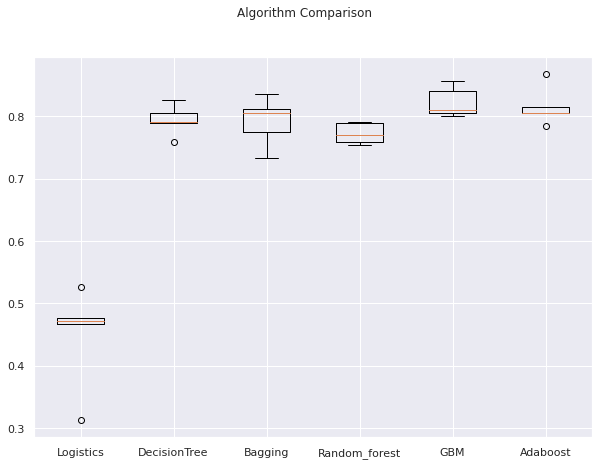

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

Among all, GBM gave the best score without any outliers. Adaboost, DecisionTree have good scores but have outliers. 

Even though recall is what we are looking to improve, let's check other scores like accuracy, f1, precision of all 6 models as well.

In [ ]:
# check on training data
for name, model in models:
  print(f"Training performance of {name}\n",model_performance_classification_sklearn(model, X_train, y_train))

Training performance of Logistics
    Accuracy    Recall  Precision        F1
0  0.872757  0.403689   0.673504  0.504805
Training performance of DecisionTree
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Training performance of Bagging
    Accuracy    Recall  Precision        F1
0  0.997202  0.985656   0.996891  0.991242
Training performance of Random_forest
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Training performance of GBM
    Accuracy    Recall  Precision        F1
0  0.973498  0.880123   0.951274  0.914316
Training performance of Adaboost
    Accuracy    Recall  Precision        F1
0  0.959671  0.845287   0.897715  0.870712


In [ ]:
# check on validation data
for name, model in models:
  print(f"Validation performance of {name}\n",model_performance_classification_sklearn(model, X_val, y_val))

Validation performance of Logistics
    Accuracy    Recall  Precision        F1
0  0.883021  0.478528   0.699552  0.568306
Validation performance of DecisionTree
    Accuracy    Recall  Precision        F1
0   0.94077  0.822086   0.812121  0.817073
Validation performance of Bagging
    Accuracy    Recall  Precision        F1
0  0.956565  0.825153   0.896667  0.859425
Validation performance of Random_forest
    Accuracy    Recall  Precision       F1
0   0.96002  0.812883   0.929825  0.86743
Validation performance of GBM
    Accuracy    Recall  Precision        F1
0  0.969398  0.865031       0.94  0.900958
Validation performance of Adaboost
    Accuracy    Recall  Precision        F1
0  0.961007  0.858896   0.894569  0.876369


Create confusion matrix on all 6 models.

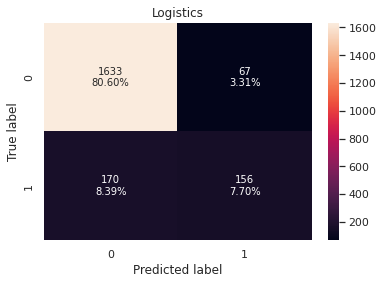

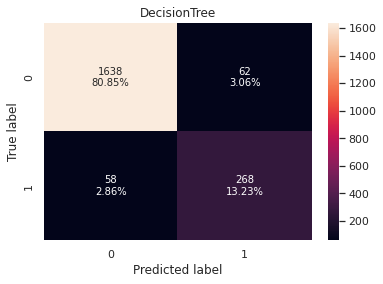

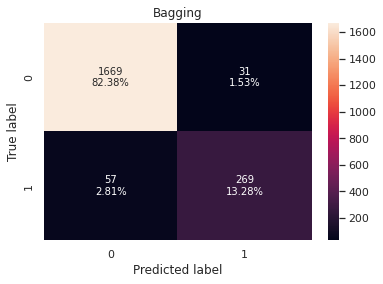

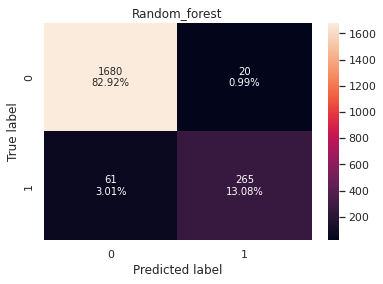

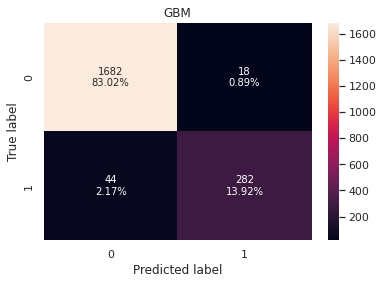

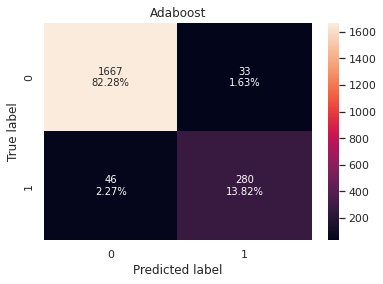

In [ ]:
for name, model in models:
  confusion_matrix_sklearn(model, X_val, y_val,name)

After looking at overall performance on scores and confusion matrix from all 6 models, Gradient boost did the best in cross val, training and val. 

# **7. Model building Oversampled Data**

As both classes in target column are imbalance, let's try different sampling method. Here I will try oversampling the data using SMOTE. Same like before, I would like to create models using KFold and cross_val_score to get the cross_val score along with train and val scores.

In [ ]:
# applying smote
print("Before Oversampling, counts of label 'Attrited Customer': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Existing Customer': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Attrited Customer': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Existing Customer': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Attrited Customer': 976
Before Oversampling, counts of label 'Existing Customer': 5099 

After Oversampling, counts of label 'Attrited Customer': 5099
After Oversampling, counts of label 'Existing Customer': 5099 

After Oversampling, the shape of train_X: (10198, 28)
After Oversampling, the shape of train_y: (10198,) 



Training dataset looks good. Both classes have same counts.

In [ ]:
# build models
models_oversample = []  # Empty list to store all the models

# Appending models into the list
models_oversample.append(("Logistics_oversample", LogisticRegression(random_state=1)))
models_oversample.append(("DecisionTree_oversample", DecisionTreeClassifier(random_state=1)))
models_oversample.append(("Bagging_oversample", BaggingClassifier(random_state=1)))
models_oversample.append(("Random_forest_oversample", RandomForestClassifier(random_state=1)))
models_oversample.append(("GBM_oversample", GradientBoostingClassifier(random_state=1)))
models_oversample.append(("Adaboost_oversample", AdaBoostClassifier(random_state=1)))


results_oversample = []  # Empty list to store all model's CV scores
names_oversample = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name_oversample, model_oversample in models_oversample:
    scoring = "recall"
    kfold_oversample = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_oversample = cross_val_score(
        estimator=model_oversample, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold_oversample
    )
    results_oversample.append(cv_result_oversample)
    names_oversample.append(name_oversample)
    print("{}: {}".format(name_oversample, cv_result_oversample.mean() * 100))

print("\n" "Training Performance:" "\n")

for name_oversample, model_oversample in models_oversample:
    model_oversample.fit(X_train_over, y_train_over)
    scores_oversample = recall_score(y_train_over, model_oversample.predict(X_train_over)) * 100
    print("{}: {}".format(name_oversample, scores_oversample))


Cross-Validation Performance:

Logistics_oversample: 82.03613692778389
DecisionTree_oversample: 95.1168004002386
Bagging_oversample: 96.72479747541803
Random_forest_oversample: 97.99965363966979
GBM_oversample: 97.19553964863667
Adaboost_oversample: 95.99921106813679

Training Performance:

Logistics_oversample: 82.44753873308493
DecisionTree_oversample: 100.0
Bagging_oversample: 99.84310649146892
Random_forest_oversample: 100.0
GBM_oversample: 98.11727789762699
Adaboost_oversample: 96.70523632084722


We got higher cross val and training score compare to before in all the classifiers. Logistics also improved a lot, but still lesser than others.

Let's plot the results.

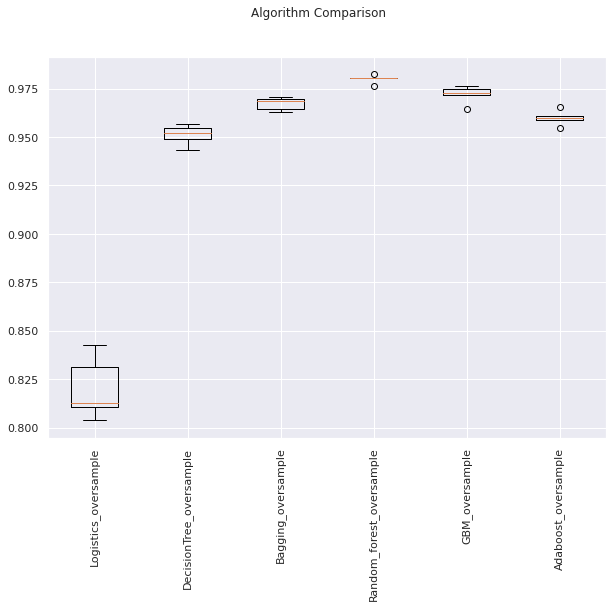

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_oversample)
ax.set_xticklabels(names_oversample)

plt.xticks(rotation = 90)
plt.show()

Randomforest got the highest cross val score with all the scores very near to each other, however it has outliers and so gradient and adaboost. 

Let's check other scores like accuracy, f1, precision of all 6 models as well. 

In [ ]:
# check on training data
for name_oversample, model_oversample in models_oversample:
  print(f"Training performance of {name_oversample}\n",model_performance_classification_sklearn(model_oversample, X_train_over, y_train_over))


Training performance of Logistics_oversample
    Accuracy    Recall  Precision        F1
0  0.826437  0.824475   0.827722  0.826096
Training performance of DecisionTree_oversample
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Training performance of Bagging_oversample
    Accuracy    Recall  Precision        F1
0  0.998431  0.998431   0.998431  0.998431
Training performance of Random_forest_oversample
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Training performance of GBM_oversample
    Accuracy    Recall  Precision        F1
0  0.976858  0.981173   0.972779  0.976958
Training performance of Adaboost_oversample
    Accuracy    Recall  Precision        F1
0  0.961757  0.967052   0.956918  0.961959


In [ ]:
# check on validation data
for name_oversample, model_oversample in models_oversample:
  print(f"Validation performance of {name_oversample}\n",model_performance_classification_sklearn(model_oversample, X_val, y_val))

Validation performance of Logistics_oversample
    Accuracy    Recall  Precision        F1
0   0.82922  0.815951   0.481884  0.605923
Validation performance of DecisionTree_oversample
    Accuracy    Recall  Precision        F1
0  0.929418  0.831288   0.754875  0.791241
Validation performance of Bagging_oversample
    Accuracy    Recall  Precision        F1
0   0.94768  0.874233   0.814286  0.843195
Validation performance of Random_forest_oversample
    Accuracy    Recall  Precision        F1
0  0.952616  0.871166   0.840237  0.855422
Validation performance of GBM_oversample
    Accuracy   Recall  Precision        F1
0  0.956565  0.90184       0.84  0.869822
Validation performance of Adaboost_oversample
    Accuracy    Recall  Precision        F1
0  0.944225  0.886503   0.791781  0.836469


Create confusion matrix on validation data of all 6 models.

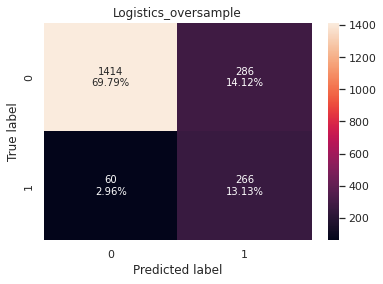

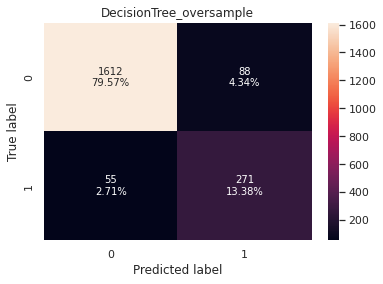

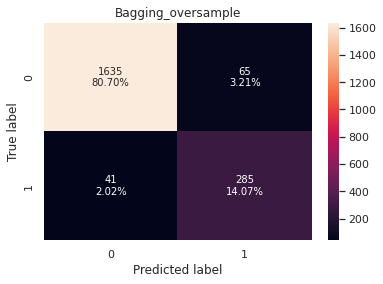

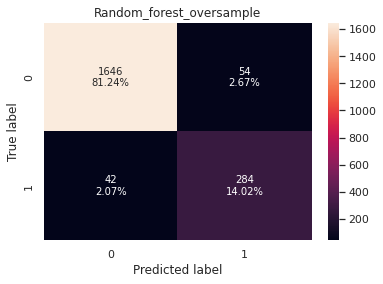

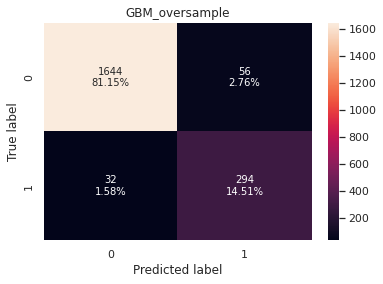

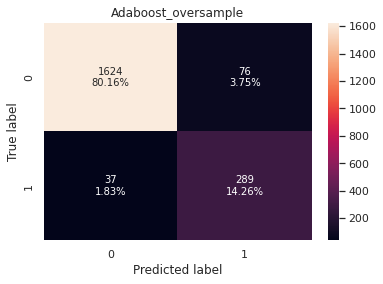

In [ ]:
for name_oversample, model_oversample in models_oversample:
  confusion_matrix_sklearn(model_oversample, X_val, y_val,name_oversample)

By observing all the scores, including cross val and confusion matrix, I would say randomeforest did the best. 

# **8. Model building - Undersampled Data**

In this section, let's try to undersample data as we have inbalance in target column. I would like to use Random Undersampler for that. Same like others, I would like to create models using KFold and cross_val_score to get the cross_val score along with train and val scores.

In [ ]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
# check the data
print("Before Undersampling, counts of label 'Attrited Customer': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'Existing Customer': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Attrited Customer': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'Existing Customer': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Attrited Customer': 976
Before Undersampling, counts of label 'Existing Customer': 5099 

After Undersampling, counts of label 'Attrited Customer': 976
After Undersampling, counts of label 'Existing Customer': 976 

After Undersampling, the shape of train_X: (1952, 28)
After Undersampling, the shape of train_y: (1952,) 



Looks good. Both classes have the same values now. 

In [ ]:
# building models

models_un = []  # Empty list to store all the models

# Appending models into the list
models_un.append(("Logistics_un", LogisticRegression(random_state=1)))
models_un.append(("DecisionTree_un", DecisionTreeClassifier(random_state=1)))
models_un.append(("Bagging_un", BaggingClassifier(random_state=1)))
models_un.append(("Random_forest_un", RandomForestClassifier(random_state=1)))
models_un.append(("GBM_un", GradientBoostingClassifier(random_state=1)))
models_un.append(("Adaboost_un", AdaBoostClassifier(random_state=1)))


results_un = []  # Empty list to store all model's CV scores
names_un = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name_un, model_un in models_un:
    scoring = "recall"
    kfold_un = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_un = cross_val_score(
        estimator=model_un, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold_un
    )
    results_un.append(cv_result_un)
    names_un.append(name_un)
    print("{}: {}".format(name_un, cv_result_un.mean() * 100))

print("\n" "Training Performance:" "\n")

for name_un, model_un in models_un:
    model_un.fit(X_train_un, y_train_un)
    scores_un = recall_score(y_train_un, model_un.predict(X_train_un)) * 100
    print("{}: {}".format(name_un, scores_un))


Cross-Validation Performance:

Logistics_un: 80.01936159079015
DecisionTree_un: 88.72946101517532
Bagging_un: 90.98430141287285
Random_forest_un: 93.5468341182627
GBM_un: 94.26216640502355
Adaboost_un: 93.24018838304553

Training Performance:

Logistics_un: 83.09426229508196
DecisionTree_un: 100.0
Bagging_un: 99.18032786885246
Random_forest_un: 100.0
GBM_un: 98.15573770491804
Adaboost_un: 95.38934426229508


Similar to oversample, all the models did good in cross val and training. Also, their scores are close in both scenarios, except for decision tree, so could be the case of overfitting. 

Let's plot the results.

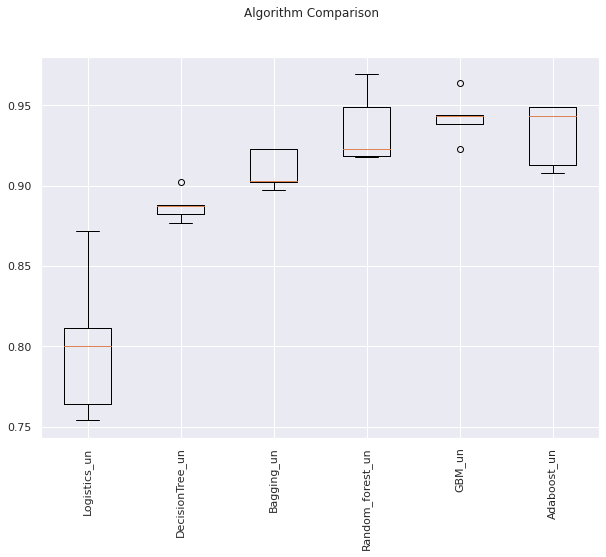

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_un)
ax.set_xticklabels(names_un)

plt.xticks(rotation = 90)
plt.show()

Adaboost and Randomforest did the best among all, also they don't have the outliers. Adaboost have higher median value in cross val scores compare to randomforest.

Let's check other scores like accuracy, f1, precision of all 6 models as well. 

In [ ]:
# check on training data
for name_un, model_un in models_un:
  print(f"Training performance of {name_un}\n",model_performance_classification_sklearn(model_un, X_train_un, y_train_un))


Training performance of Logistics_un
    Accuracy    Recall  Precision        F1
0  0.815061  0.830943   0.805362  0.817953
Training performance of DecisionTree_un
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Training performance of Bagging_un
    Accuracy    Recall  Precision       F1
0  0.994365  0.991803    0.99691  0.99435
Training performance of Random_forest_un
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Training performance of GBM_un
    Accuracy    Recall  Precision       F1
0   0.97541  0.981557   0.969636  0.97556
Training performance of Adaboost_un
    Accuracy    Recall  Precision        F1
0   0.94877  0.953893   0.944219  0.949032


In [ ]:
# check on validation data
for name_un, model_un in models_un:
  print(f"Validation performance of {name_un}\n",model_performance_classification_sklearn(model_un, X_val, y_val))


Validation performance of Logistics_un
    Accuracy    Recall  Precision       F1
0  0.802073  0.812883   0.438017  0.56928
Validation performance of DecisionTree_un
    Accuracy   Recall  Precision        F1
0  0.891412  0.90184   0.609959  0.727723
Validation performance of Bagging_un
    Accuracy    Recall  Precision   F1
0  0.925962  0.920245   0.707547  0.8
Validation performance of Random_forest_un
    Accuracy    Recall  Precision        F1
0  0.936821  0.941718   0.737981  0.827493
Validation performance of GBM_un
    Accuracy    Recall  Precision        F1
0  0.940276  0.969325   0.740047  0.839309
Validation performance of Adaboost_un
    Accuracy    Recall  Precision        F1
0   0.93386  0.969325   0.718182  0.825065


Create confusion matrix on validation data of all 6 models.

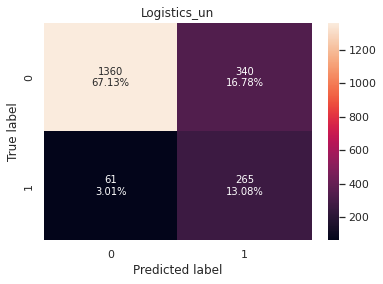

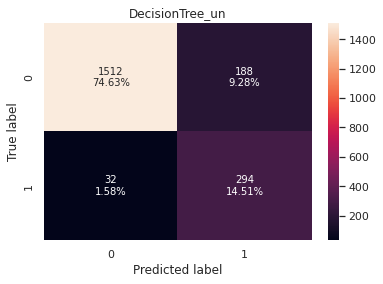

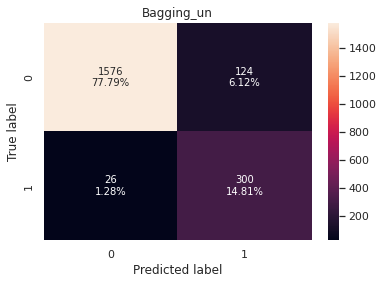

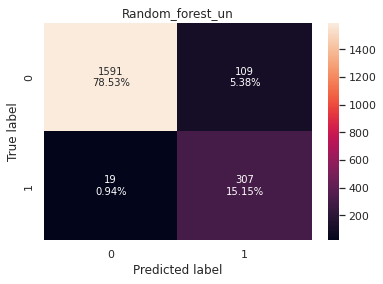

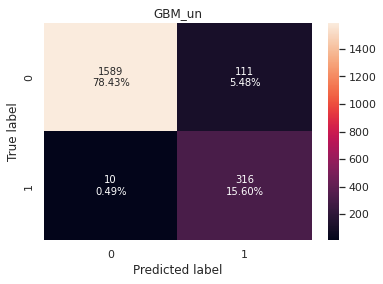

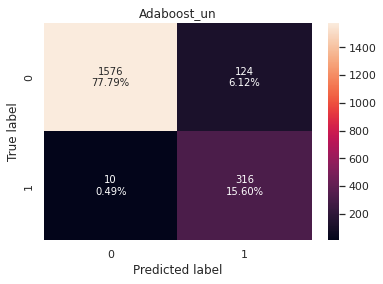

In [ ]:
for name_un, model_un in models_un:
  confusion_matrix_sklearn(model_un, X_val, y_val,name_un)

Out of all, I find adaboost is the best considering its cross val, traning and val scores. 

# **9. Hyperparameter Tuning Using Random Search**

After doing analysis on 18 models in above section, I came to conclusion to use below top models.

1) Gradient Booster with regular data. 

2) Random Forest with Oversample data. Also, with oversample, we have observed big jump in logistics regression scores. I would like to try Logistics with Regularization to see if it improves further. 

3) Adaboost with Undersample data.

##**9.1 Gradient Booster**

Let's run randomized search cv to find out best parameters from the given list.

In [ ]:
%%time 

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 200, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1],
    'max_depth':np.arange(1,5,1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': 170, 'max_features': 0.7, 'max_depth': 3, 'learning_rate': 0.2} with CV score=0.8575510204081633:
CPU times: user 5.88 s, sys: 366 ms, total: 6.25 s
Wall time: 4min 14s


In [ ]:
# building model with best parameters
gbc_tuned = GradientBoostingClassifier(
    n_estimators=170,
    learning_rate=0.2,
    random_state=1,
    subsample=0.8,
    max_features=0.7,
    max_depth=3
)

# Fit the model on training data
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.7,
                           n_estimators=170, random_state=1, subsample=0.8)

Model is fit with best parameters. Let's check their train, validation and test scores.

Training performance:
   Accuracy    Recall  Precision        F1
0  0.993909  0.974385   0.987539  0.980918
*************************************


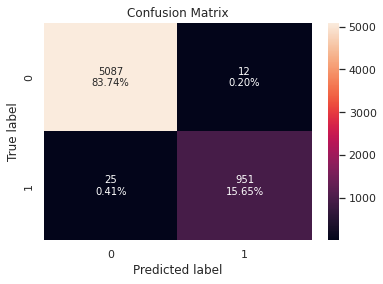

In [ ]:
# Calculating different metrics on train set
gbc_random_train = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:")
print(gbc_random_train)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

Validation performance:
   Accuracy    Recall  Precision        F1
0  0.971372  0.880368   0.937908  0.908228
*************************************


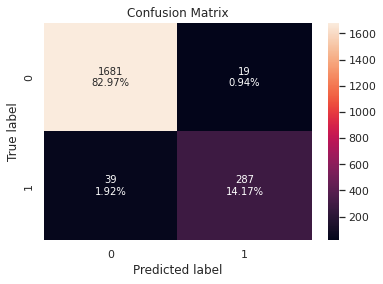

In [ ]:
# Calculating different metrics on val set
gbc_random_val = model_performance_classification_sklearn(
    gbc_tuned, X_val, y_val
)
print("Validation performance:")
print(gbc_random_val)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)

Testing performance:
   Accuracy    Recall  Precision        F1
0  0.977789  0.910769   0.948718  0.929356
*************************************


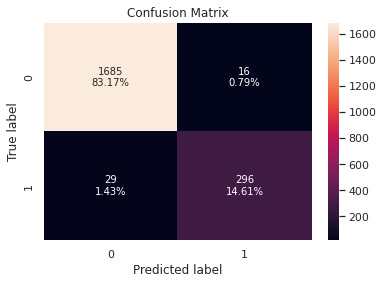

In [ ]:
# Calculating different metrics on test set
gbc_random_test = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:")
print(gbc_random_test)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

Model did good, recall is more than 90% in test and bit less in val. Also, other scores like precision and f1 did above 90% too. 

##**9.2.1 Random Forest with Oversample**

Let's run randomized search cv to find out best parameters from the given list.

In [ ]:
%%time 

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 200, 10),
    "min_samples_leaf": np.arange(1,6,1),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 160, 'min_samples_leaf': 1, 'max_samples': 0.5, 'max_features': 0.30000000000000004} with CV score=0.9760776616829263:
CPU times: user 5.66 s, sys: 386 ms, total: 6.04 s
Wall time: 4min 36s


In [ ]:
# building model with best parameters
rf_tuned = RandomForestClassifier(
    n_estimators=160,
    min_samples_leaf=1, 
    max_samples=0.5, 
    max_features=0.3000000000000004
)

# Fit the model on training data
rf_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features=0.3000000000000004, max_samples=0.5,
                       n_estimators=160)

Model is fit with best parameters. Let's check their train, validation and test scores.

Training performance:
   Accuracy    Recall  Precision        F1
0  0.998039  0.999804   0.996287  0.998042
*************************************


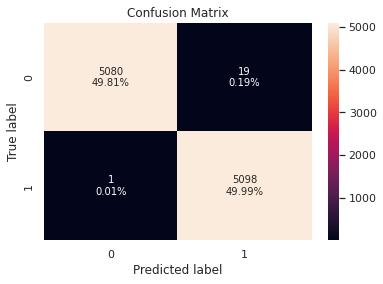

In [ ]:
# Calculating different metrics on train set
rf_random_train = model_performance_classification_sklearn(
    rf_tuned, X_train_over, y_train_over
)
print("Training performance:")
print(rf_random_train)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_train_over, y_train_over)

Validation performance:
   Accuracy    Recall  Precision        F1
0  0.950642  0.892638   0.817416  0.853372
*************************************


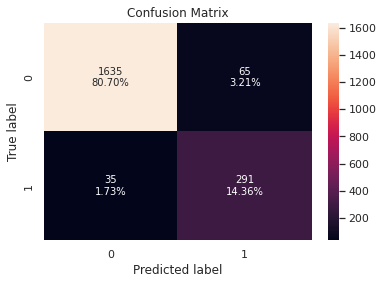

In [ ]:
# Calculating different metrics on val set
rf_random_val = model_performance_classification_sklearn(
    rf_tuned, X_val, y_val
)
print("Validation performance:")
print(rf_random_val)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

Testing performance:
   Accuracy    Recall  Precision        F1
0  0.960513  0.932308   0.839335  0.883382
*************************************


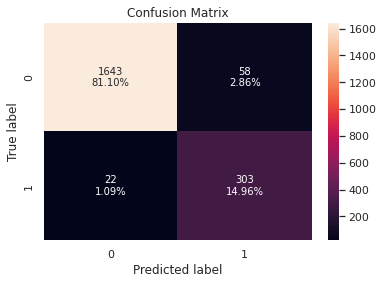

In [ ]:
# Calculating different metrics on test set
rf_random_test = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
print("Testing performance:")
print(rf_random_test)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

Model performed better than before. Recall over is also more than 90% on test and bit less in val.

##**9.2.2 Logistics Regression with Oversample**

Let's run randomized search cv to find out best parameters from the given list. It will also reveal what regularization would fit the best.

In [ ]:
# Choose the type of classifier.
lr_estimator = LogisticRegression(random_state=1)

# Grid of parameters to choose from
parameters = {"C": np.arange(0.1, 1.1, 0.1),
              "penalty": ['l1','l2'],
              "solver":['liblinear','newton-cg','sag','saga']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=parameters, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.30000000000000004} with CV score=0.8664603898477938:


In [ ]:
# building model with best parameters
lg_tuned = LogisticRegression(
    C=0.30000000000000004,
    penalty='l2',
    solver="newton-cg",
    random_state=1,

)

# Fit the model on training data
lg_tuned.fit(X_train_over, y_train_over)

LogisticRegression(C=0.30000000000000004, random_state=1, solver='newton-cg')

Model is fit with best parameters. Let's check their train, validation and test scores.

Training performance:
   Accuracy    Recall  Precision        F1
0  0.904883  0.904295    0.90536  0.904827
*************************************


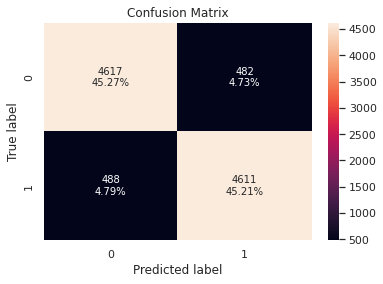

In [ ]:
# Calculating different metrics on train set
lg_random_train = model_performance_classification_sklearn(
    lg_tuned, X_train_over, y_train_over
)
print("Training performance:")
print(lg_random_train)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(lg_tuned, X_train_over, y_train_over)

Validation performance:
   Accuracy    Recall  Precision        F1
0  0.875617  0.711656   0.594872  0.648045
*************************************


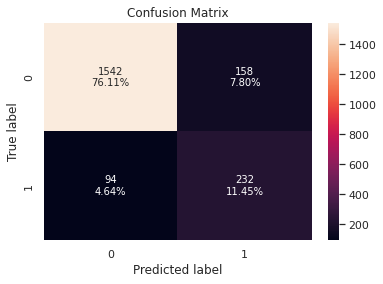

In [ ]:
# Calculating different metrics on val set
lg_random_val = model_performance_classification_sklearn(
    lg_tuned, X_val, y_val
)
print("Validation performance:")
print(lg_random_val)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(lg_tuned, X_val, y_val)

Testing performance:
   Accuracy    Recall  Precision        F1
0  0.877591  0.744615   0.594595  0.661202
*************************************


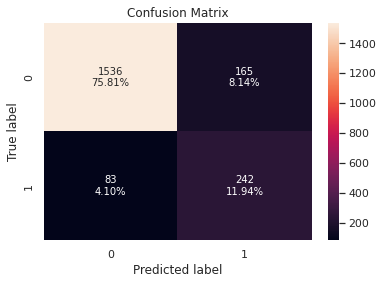

In [ ]:
# Calculating different metrics on test set
lg_random_test = model_performance_classification_sklearn(
    lg_tuned, X_test, y_test
)
print("Testing performance:")
print(lg_random_test)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(lg_tuned, X_test, y_test)

It didn't improve with regularization. It did bit better than first time, but still its not good compare to what we have seen so far. 

##**9.3 Adaboost with Undersample**

Let's run randomized search cv to find out best parameters from the given list.

In [ ]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.951862899005756:
CPU times: user 2.54 s, sys: 108 ms, total: 2.64 s
Wall time: 57.4 s


In [ ]:
# building model with best parameters
adb_tuned = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=0.1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

Model is fit with best parameters. Let's check their train, validation and test scores.

Training performance:
   Accuracy    Recall  Precision        F1
0   0.98668  0.992828   0.980769  0.986762
*************************************


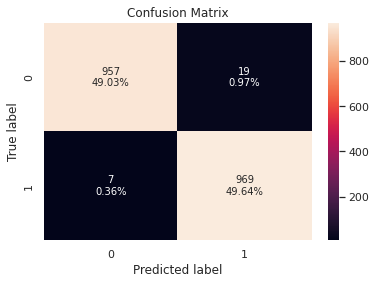

In [ ]:
# Calculating different metrics on train set
adb_random_train = model_performance_classification_sklearn(
    adb_tuned, X_train_un, y_train_un
)
print("Training performance:")
print(adb_random_train)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(adb_tuned, X_train_un, y_train_un)

Validation performance:
   Accuracy   Recall  Precision       F1
0  0.936328  0.96319   0.728538  0.82959
*************************************


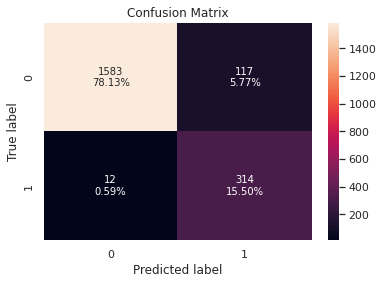

In [ ]:
# Calculating different metrics on val set
adb_random_val = model_performance_classification_sklearn(
    adb_tuned, X_val, y_val
)
print("Validation performance:")
print(adb_random_val)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(adb_tuned, X_val, y_val)

Testing performance:
   Accuracy    Recall  Precision        F1
0  0.939783  0.966154   0.738824  0.837333
*************************************


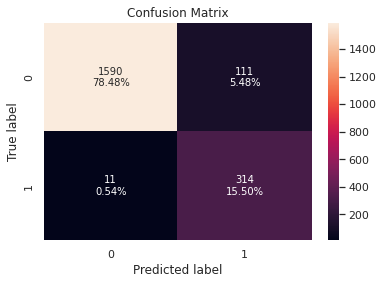

In [ ]:
# Calculating different metrics on test set
adb_random_test = model_performance_classification_sklearn(
    adb_tuned, X_test, y_test
)
print("Testing performance:")
print(adb_random_test)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(adb_tuned, X_test, y_test)

It has improved a lot. The recall is more than 96% in both val and test. Other scores are not that high, but not bad also. 

## **9.4 Comparing all Tuned models**

Let's compare all 4 models on their train, test and validation results.

Comparing all the models on training data

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat([gbc_random_train.T,rf_random_train.T,adb_random_train.T,lg_random_train.T],axis=1,)
models_train_comp_df.columns = ["Gradient Classifier","RandomForest Classifier","Adaboost Classifier","Logistics Regression"]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Gradient Classifier  RandomForest Classifier  Adaboost Classifier  \
Accuracy              0.993909                 0.998039             0.986680   
Recall                0.974385                 0.999804             0.992828   
Precision             0.987539                 0.996287             0.980769   
F1                    0.980918                 0.998042             0.986762   

           Logistics Regression  
Accuracy               0.904883  
Recall                 0.904295  
Precision              0.905360  
F1                     0.904827

Comparing all the models on validation data

In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat([gbc_random_val.T,rf_random_val.T,adb_random_val.T,lg_random_val.T],axis=1,)
models_val_comp_df.columns = ["Gradient Classifier","RandomForest Classifier","Adaboost Classifier","Logistics Regression"]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Gradient Classifier  RandomForest Classifier  Adaboost Classifier  \
Accuracy              0.971372                 0.950642             0.936328   
Recall                0.880368                 0.892638             0.963190   
Precision             0.937908                 0.817416             0.728538   
F1                    0.908228                 0.853372             0.829590   

           Logistics Regression  
Accuracy               0.875617  
Recall                 0.711656  
Precision              0.594872  
F1                     0.648045

Comparing all the models  on testing data

In [ ]:
# test performance comparison

models_test_comp_df = pd.concat([gbc_random_test.T,rf_random_test.T,adb_random_test.T,lg_random_test.T],axis=1,)
models_test_comp_df.columns = ["Gradient Classifier","RandomForest Classifier","Adaboost Classifier","Logistics Regression"]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Gradient Classifier  RandomForest Classifier  Adaboost Classifier  \
Accuracy              0.977789                 0.960513             0.939783   
Recall                0.910769                 0.932308             0.966154   
Precision             0.948718                 0.839335             0.738824   
F1                    0.929356                 0.883382             0.837333   

           Logistics Regression  
Accuracy               0.877591  
Recall                 0.744615  
Precision              0.594595  
F1                     0.661202

Other than logistics regression, rest all 3 chosen models did really good after the hypertuning. Recall is above 90% in all 3 of them. Adaboost did the best with more than 96%. It has bit lower precision and f1 compare to other two, but still not that low.   

I would consider Adaboost with undersample the best model and would like to go with it to productionalize the data. 

Let's find the important features for top 3 models.

In [ ]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
Total_Trans_Amt                 0.265709
Total_Trans_Ct                  0.230276
Total_Revolving_Bal             0.128379
Total_Ct_Chng_Q4_Q1             0.122015
Total_Relationship_Count        0.075825
Total_Amt_Chng_Q4_Q1            0.059260
Customer_Age                    0.025155
Credit_Limit                    0.023574
Contacts_Count_12_mon           0.019235
Months_Inactive_12_mon          0.016713
Avg_Utilization_Ratio           0.016133
Months_on_book                  0.004830
Gender_M                        0.003657
Marital_Status_Married          0.002001
Card_Category_Gold              0.001421
Dependent_count                 0.001220
Marital_Status_Single           0.000927
Education_Level_Uneducated      0.000882
Education_Level_High School     0.000752
Income_Category_$40K - $60K     0.000437
Education_Level_Doctorate       0.000319
Income_Category_$60K - $80K     0.000299
Income_Category_Less than $40K  0.000271
Education_Level_

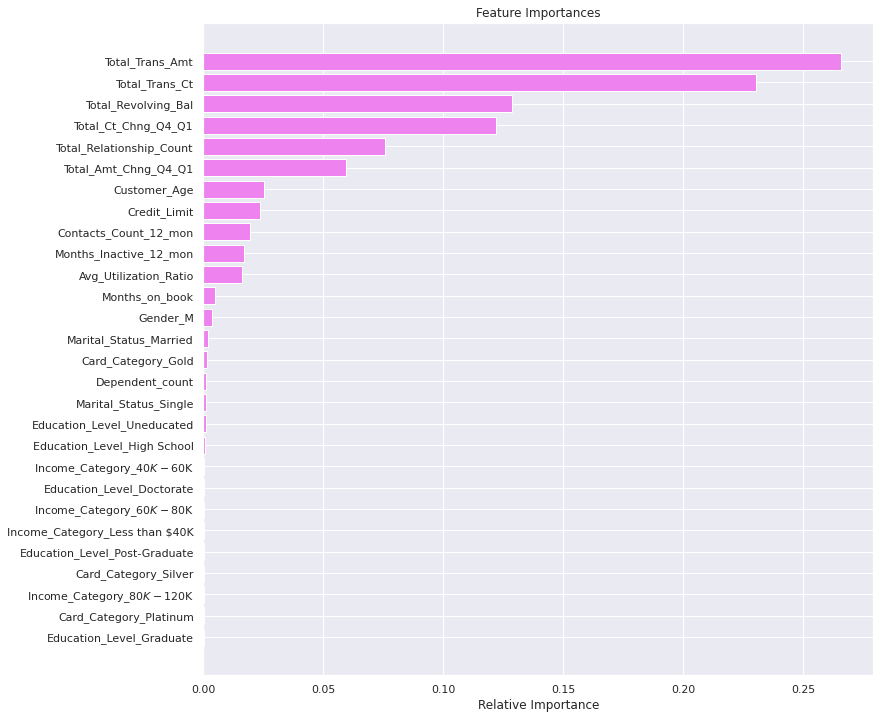

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The most important feature is product pitched basic followed by Passport and married marital status. 

In [ ]:
feature_names = X_train_un.columns
importances = adb_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(adb_tuned.feature_importances_, columns = ["Imp"], index = X_train_un.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
Total_Trans_Amt                 0.266107
Total_Trans_Ct                  0.138380
Total_Amt_Chng_Q4_Q1            0.103095
Total_Revolving_Bal             0.102927
Total_Ct_Chng_Q4_Q1             0.091543
Total_Relationship_Count        0.049839
Customer_Age                    0.041105
Credit_Limit                    0.038265
Contacts_Count_12_mon           0.031736
Dependent_count                 0.028574
Months_Inactive_12_mon          0.028461
Months_on_book                  0.022580
Avg_Utilization_Ratio           0.018416
Education_Level_Uneducated      0.010792
Income_Category_Less than $40K  0.008080
Gender_M                        0.007665
Marital_Status_Married          0.004530
Income_Category_$60K - $80K     0.004117
Education_Level_Post-Graduate   0.002507
Income_Category_$40K - $60K     0.001281
Income_Category_$80K - $120K    0.000000
Card_Category_Platinum          0.000000
Card_Category_Gold              0.000000
Education_Level_

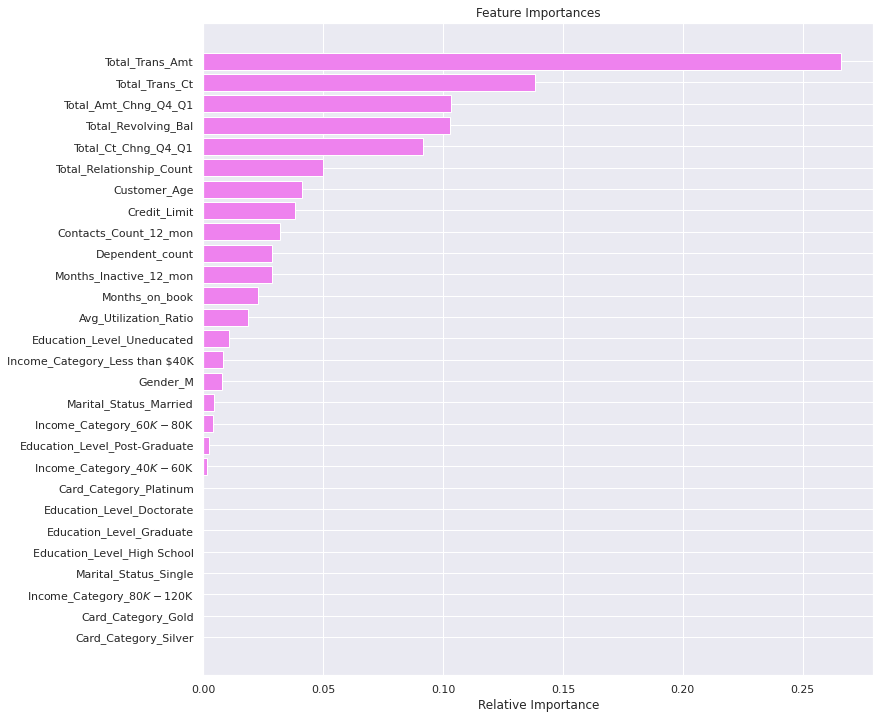

In [ ]:
importances = adb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
feature_names = X_train_over.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train_over.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
Total_Trans_Amt                 0.231682
Total_Trans_Ct                  0.227744
Total_Revolving_Bal             0.107828
Total_Ct_Chng_Q4_Q1             0.093591
Total_Amt_Chng_Q4_Q1            0.054984
Total_Relationship_Count        0.054706
Avg_Utilization_Ratio           0.052247
Credit_Limit                    0.029338
Customer_Age                    0.025466
Marital_Status_Married          0.020393
Gender_M                        0.018743
Months_on_book                  0.015918
Months_Inactive_12_mon          0.010887
Contacts_Count_12_mon           0.009904
Marital_Status_Single           0.007582
Dependent_count                 0.007297
Education_Level_Graduate        0.004601
Income_Category_$60K - $80K     0.004560
Income_Category_$80K - $120K    0.004326
Income_Category_Less than $40K  0.004235
Education_Level_High School     0.003886
Income_Category_$40K - $60K     0.003309
Education_Level_Uneducated      0.002838
Education_Level_

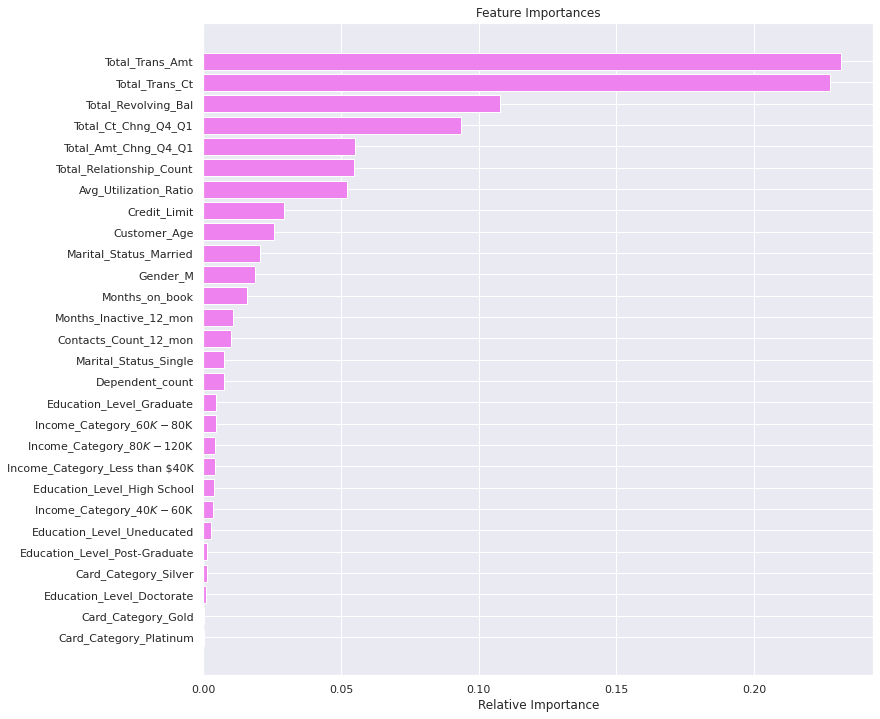

In [ ]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In all 3 models, total transaction amount and count considered to be the top most features, followed by either revoloving balance or other transaction amount/count columns. The important features considered by all 3 models are pretty similar. 


# **10. Productionize The Model**

As in our analysis so far, adaboost with undersample turned out to be the best model. Hyperparameter tuning was done using randomized search, so it is possible to have better parameter setting with same or other model, but I am happy with the scores we are getting with whatever randomized search produced. So would like to move ahead with that in production. 


For that let's create the pipeline. First, let's import required module to create the pipeline.

In [59]:
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

For pipeline building, I would like to use dataset data1 that I created earlier, which has some pre-processing done before converting into X and y and splitting.


In [132]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

As we have done the thourough analysis of the data and models and found the best one to work with, we do not need to split the data into validation anymore. So I will just do train and test split. 

In [133]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


Create column transformer to impute the missing values and do one hot coding

In [134]:
# column transformer
reqd_col_for_impute = ['Marital_Status','Education_Level','Income_Category']
cat_cols=['Gender','Card_Category','Marital_Status','Education_Level','Income_Category']
imputation_encoding = ColumnTransformer(
    transformers=
    [
        ("imputing_cat", KNNImputer(n_neighbors=5), reqd_col_for_impute),
        ("encoding_cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="passthrough",
)

Let's create the pipeline with above tranform and best model we identified. 

In [140]:
# Creating new pipeline with best parameters
pipe = Pipeline(
    steps=[
        ("imputation_encoding", imputation_encoding),
        ("AdaBoost",
            AdaBoostClassifier(
              n_estimators=90,
              learning_rate=0.1,
              random_state=1,
              base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
            ),
        ),
    ]
)

# Fit the model on training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputation_encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputing_cat', KNNImputer(),
                                                  ['Marital_Status',
                                                   'Education_Level',
                                                   'Income_Category']),
                                                 ('encoding_cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Card_Category',
                                                   'Marital_Status',
                                                   'Education_Level',
                                                   'Income_Category'])])),
                ('AdaBoost',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                             

Looks good, just check value of test data once.

In [136]:
pipe.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

Providing results in 1 and 0 as expected.

Check the pipeline score on training and testing

In [137]:
# score on training
pipe.score(X_train, y_train)

0.9827878103837472

In [138]:
# score on testing
pipe.score(X_test, y_test)

0.9690687726225732

Looks good, as expected.

# **11. Summary of Insights & Recommendations**

As part of this project, we have analyzed the customer data of "Thera Bank" where they found recent decline in their credit card customer base. The purpose was to find who will leave their credit card services and reason for same, so that bank could improve upon those areas.

Based on the nature of the objective and the data provided, recall metrics was the best to measure for both the kind of modeling. 

To achieve the goal, we tried multiple modeling techniques. Created 6 models using different classifiers like adaboost, gradient, bagigng, randomforest, decision tree and logistics with default values. The target classes were imbalance, so applied oversample and undersample techniques and created 6 models with above same classifiers for each. 

Out of 18 models that we created, found 3 best and tried hyperparameter tuning and found the best out of that which gave more than 96% of recall score on test data. We were able to achieve that with adaboost classifier and best fit parameters of it. 

While working on all these models and doing EDA, I have gatherd below insights and recommendations. 

*   In all the final models, toal transaction amount and count of last 12 months and total revolving balance turned out to be the most important features. Higher the transactions customers do, higher their chances of being with bank. To make customers do more transactions, bank can offer like membership rewards, cash back, travel miles etc. with each transaction they do.  

*   It was observed that when customer has more relationships with bank (>3), meaning when they have more products purchased with bank, they likely to stay more. Once you are in eco system, it's hard to get out. Bank should target customers with 3 or less prodcuts and offer them discounts or free trials on other products and try to hook them up to it, it will increase their chances of keeping them. 

*   During EDA found that, higher contacts with bank result in customer becoming attried. It was not clear who customer contacts the bank, like customer service, sales person, cashier etc, but bank should definitely look into it as it's alarming that bank employees are not able to resolve their issues/concerns and making them leave. Bank should invest in training their staff more or find out what is lacking and try to work on that.    

*   Bank has more female customers than male and female attrition percentage is bit higher than male. It was observed that male has much higher credit limit tham female, so may be bank should look into increasing credit limit for female and see if that make them stay more. Also, try to target more male audience as well. 

*   Bank offers 5 different kinds of cards. Highest attrition ratio is on Platinum card, so bank should look into may be fees are too high or the rewards it offers are lower compare to other competitors. The number of customers are also less in this category but if bank improves their customer base in this card category, it could benifit more to the bank. 

*   Majority attrited customers have less avg utilization ratio, meaning they are not using their card frequently and end up closing it eventually. Bank should target such customers when they slow down using their card, try to lure them in using the card by providing attractive offers like, say 15% cash back on particular restaurant for certain time period, or 10% cash back on some store until $100 purchase, something like that, which will attract customer to use their card when they do purchase.  

* In the given dataset, the minimum customer age is 26 and median is 46. Bank should look into targeting younger customers as usually people start using credit card in their late teens. If bank can make them customer at that age, it is more likely they will stay longer period of time and bank can increase their business. 

Bank wants to know what services to improve to customer can retain, however, in the given dataset, there is no data about what kind of services customers (existiing and attrited) are/were using. It could be an important feature for the model to identify what service/area to improve upon.  

In the beginning of the project, below 4 objectives were given -  

*   Explore and visualize the dataset
*   Build a classification model to predict if the customer is going to churn or not
*   Optimize the model using appropriate techniques
*   Generate a set of insights and recommendations that will help the bank

All got achieved. 
